In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import os
import random
from datetime import datetime
import scipy
import seaborn as sns
import time

In [2]:
# Read all files in the directory
def read_file(in_folder, percent=1, random=True):
    i = 0
    # Random sampling
    all_files = sorted(os.listdir(in_folder))
    num_files = int(np.floor(len(all_files) * percent))
    if random: 
        chosen_files = random.sample(all_files, num_files)
    else: 
        chosen_files = all_files[:num_files]
    
    for file in chosen_files:
        file_name = in_folder + file
        print(file_name)
        if file_name[-9:] == '.DS_Store':
            continue
        if i == 0:
            df = pd.read_csv(file_name)
        else:
            temp_df = pd.read_csv(file_name)
            df = pd.concat([df, temp_df]).reset_index(drop=True)
        i +=1
    print('Number of files:',format(i))
    return df

In [3]:
# df_0 = read_file('data/', percent=0.04) # 16 files
df_0 = read_file('../data/', percent=0.15, random=False) # 12 files

../data/.DS_Store
../data/uk_obs_coordinates_000000000000
../data/uk_obs_coordinates_000000000001
../data/uk_obs_coordinates_000000000002
../data/uk_obs_coordinates_000000000003
../data/uk_obs_coordinates_000000000004
../data/uk_obs_coordinates_000000000005
../data/uk_obs_coordinates_000000000006
../data/uk_obs_coordinates_000000000007
../data/uk_obs_coordinates_000000000008
../data/uk_obs_coordinates_000000000009
../data/uk_obs_coordinates_000000000010
../data/uk_obs_coordinates_000000000011
Number of files: 12


In [4]:
# 41 million observations
df_0.shape

(41245511, 6)

In [5]:
# Only 1st Floor and 2nd Floor
df_0['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

In [6]:
df_0.loc[df_0['Level'].isin(['1st Floor', '2nd Floor', '3rd Floor']),:]

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460788 -0.932288   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460782 -0.932292   
4         UK Office  1st Floor  9c:8c:6e:46:0b:7c  51.460782 -0.932292   
...             ...        ...                ...        ...       ...   
41245506  UK Office  1st Floor  e4:a7:a0:99:dc:ed  51.460476 -0.932768   
41245507  UK Office  1st Floor  88:66:a5:56:03:4c  51.460377 -0.932543   
41245508  UK Office  1st Floor  88:66:a5:0e:70:77  51.460463 -0.932998   
41245509  UK Office  1st Floor  5c:5f:67:8b:e2:64  51.460456 -0.932850   
41245510  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460467 -0.932975   

                            localtime  
0         2020-09-01 23:58:49.582 UTC  
1         2020-09-01 23:58:45.435 UTC  
2         2020-09-01 23:58:38.112 UTC  
3         2020-09-01 23:58:35.379 UTC  
4         2020-09-01 23:58:29.827 UTC  
...                               ...  
41245506  2019-10-03 15:27:48.575 UTC  
41245507  2019-10-03 15:27:48.574 UTC  
41245508  2019-10-03 15:27:48.276 UTC  
41245509  2019-10-03 15:27:48.276 UTC  
41245510  2019-10-03 15:27:48.276 UTC  

[41245511 rows x 6 columns]

### Data cleaning

In [7]:
## Clean data at 1st - 3rd floor 
df_1 = df_0.loc[df_0['Level'].isin(['Ground Floor', '1st Floor', '2nd Floor']),:]
print("# rows before cleaning: {}".format(df_1.shape[0]))

# For the first rectangle, I filter out  
# Logic: left min, right max
df_2 = df_1.query("lat>=51.46038149506283 and lat<=51.46054187270378")
df_2 = df_2.query("lng>=-0.9333064334614474 and lng<=-0.9322956462351958")

df_2.reset_index(inplace=True)
df_2.tail()

# rows before cleaning: 41245511


index       Site      Level      ClientMacAddr        lat  \
19288996  41245505  UK Office  1st Floor  48:45:20:37:e8:b7  51.460482   
19288997  41245506  UK Office  1st Floor  e4:a7:a0:99:dc:ed  51.460476   
19288998  41245508  UK Office  1st Floor  88:66:a5:0e:70:77  51.460463   
19288999  41245509  UK Office  1st Floor  5c:5f:67:8b:e2:64  51.460456   
19289000  41245510  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460467   

               lng                    localtime  
19288996 -0.932770  2019-10-03 15:27:48.575 UTC  
19288997 -0.932768  2019-10-03 15:27:48.575 UTC  
19288998 -0.932998  2019-10-03 15:27:48.276 UTC  
19288999 -0.932850  2019-10-03 15:27:48.276 UTC  
19289000 -0.932975  2019-10-03 15:27:48.276 UTC

In [8]:
df_2['Level'].unique()

array(['1st Floor', '2nd Floor'], dtype=object)

In [9]:
# For the second rectangle, I filter out 
df_3 = df_1.query("lat>=51.46055295640854 and lat<=51.460984859445034")
df_3 = df_3.query("lng>=-0.932590207567124 and lng<=-0.9322208241894918")
df_3.reset_index(inplace=True)
df_3.tail()
#df_1 = pd.concat([df_2, df_3], ignore_index=True)
#print("# rows after cleaning: {}".format(df_1.shape[0]))


index       Site      Level      ClientMacAddr        lat  \
15001602  41245478  UK Office  1st Floor  48:45:20:37:c0:a3  51.460959   
15001603  41245479  UK Office  1st Floor  a4:c3:f0:a5:f0:f0  51.460951   
15001604  41245483  UK Office  1st Floor  5c:5f:67:8b:e1:b5  51.460795   
15001605  41245487  UK Office  1st Floor  c4:6e:1f:1b:4f:c0  51.460851   
15001606  41245492  UK Office  1st Floor  98:10:e8:3a:8a:6e  51.460689   

               lng                    localtime  
15001602 -0.932292  2019-10-03 15:27:49.278 UTC  
15001603 -0.932286  2019-10-03 15:27:49.278 UTC  
15001604 -0.932229  2019-10-03 15:27:49.275 UTC  
15001605 -0.932247  2019-10-03 15:27:49.271 UTC  
15001606 -0.932237  2019-10-03 15:27:49.078 UTC

In [10]:
#Merging df_2 and df_3
df_1 = pd.concat([df_2, df_3], ignore_index=True).drop_duplicates(subset=['index']).drop(columns=['index'])
print("# rows after cleaning: {}".format(df_1.shape[0]))
df_1.head(10)

# rows after cleaning: 34290608


Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
5  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
6  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
7  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
8  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
9  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                     localtime  
0  2020-09-01 23:58:49.582 UTC  
1  2020-09-01 23:58:38.112 UTC  
2  2020-09-01 23:58:29.514 UTC  
3  2020-09-01 23:58:18.046 UTC  
4  2020-09-01 23:58:09.522 UTC  
5  2020-09-01 23:57:57.986 UTC  
6  2020-09-01 23:57:44.417 UTC  
7  2020-09-01 23:57:34.422 UTC  
8  2020-09-01 23:57:27.891 UTC  
9  2020-09-01 23:57:19.409 UTC

In [11]:
## Clean data at 4th floor 
df_4 = df_0.loc[df_0['Level']=='3rd Floor',:]
print("# rows before cleaning: {}".format(df_4.shape[0]))

# For the 4th floor, I filter out  
df_4 = df_4.query("lat>=51.46042494504671 and lat<=51.46052254063351")
df_4 = df_4.query("lng>=-0.9332608338419903 and lng<=-0.9323114003049598")
print("# rows after cleaning: {}".format(df_4.shape[0]))


# rows before cleaning: 0
# rows after cleaning: 0


In [12]:
# Combined all filtered df
cleaned_df = pd.concat([df_1, df_4], ignore_index=True)
df = cleaned_df
print("# of total rows after cleaning: {}".format(df.shape[0]))

# of total rows after cleaning: 34290608


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34290608 entries, 0 to 34290607
Data columns (total 6 columns):
 #   Column         Dtype  
---  ------         -----  
 0   Site           object 
 1   Level          object 
 2   ClientMacAddr  object 
 3   lat            float64
 4   lng            float64
 5   localtime      object 
dtypes: float64(2), object(4)
memory usage: 1.5+ GB


## TODO: 
1. Remove outliers by fixing the boundary 
2. Identify fixed and mobile device
3. Engineering Job function 
4. Security level
5. Zone
6. Maintenance or not (if machine)

## Add date time columns

In [14]:
start_time = time.time()
df['normalized_time'] = pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S.%f %Z", errors="coerce").fillna(pd.to_datetime(df['localtime'], format="%Y-%m-%d %H:%M:%S %Z", errors="coerce"))
df['localtime'] = df['normalized_time']
print("--- %s mins ---" % (int(time.time() - start_time)/60))

start_time = time.time()
df['date']  = df['localtime'].dt.date
df['time']  = df['localtime'].dt.strftime('%H:%M:%S')
df["dayOfWeek"] = df["localtime"].dt.weekday # 0 is Monday, 6 is Sunday
df["IsWeekend"] = df["dayOfWeek"] >= 5
print("--- %s mins ---" % (int(time.time() - start_time)/60))

--- 8.266666666666667 mins ---
--- 2.65 mins ---


In [15]:
df.head()

Site      Level      ClientMacAddr        lat       lng  \
0  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4  UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   

                         localtime                  normalized_time  \
0 2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1 2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2 2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3 2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4 2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   

         date      time  dayOfWeek  IsWeekend  
0  2020-09-01  23:58:49          1      False  
1  2020-09-01  23:58:38          1      False  
2  2020-09-01  23:58:29          1      False  
3  2020-09-01  23:58:18          1      False  
4  2020-09-01  23:58:09          1      False

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34290608 entries, 0 to 34290607
Data columns (total 11 columns):
 #   Column           Dtype              
---  ------           -----              
 0   Site             object             
 1   Level            object             
 2   ClientMacAddr    object             
 3   lat              float64            
 4   lng              float64            
 5   localtime        datetime64[ns, UTC]
 6   normalized_time  datetime64[ns, UTC]
 7   date             object             
 8   time             object             
 9   dayOfWeek        int64              
 10  IsWeekend        bool               
dtypes: bool(1), datetime64[ns, UTC](2), float64(2), int64(1), object(5)
memory usage: 2.6+ GB


In [17]:
## Start and end date
print(min(df['date']))
print(max(df['date']))

2019-09-05
2020-09-01


## Frequency in days

In [18]:
frequency = df.groupby('ClientMacAddr')['date'].agg(total_day='nunique', total_signal = 'count').reset_index()
frequency

ClientMacAddr  total_day  total_signal
0     00:08:22:00:b9:fb          1            13
1     00:08:22:0a:b9:fb          1             1
2     00:08:22:0e:c4:fb          1             2
3     00:08:22:20:bc:fb          1             6
4     00:08:22:24:b7:fb          1            11
...                 ...        ...           ...
9549  fc:a6:67:be:c0:a5          6           438
9550  fc:d8:48:80:ab:de          2           315
9551  fc:db:b3:31:4e:a8          1            13
9552  fc:f8:ae:5a:6f:ea          1           321
9553  fc:fc:48:36:16:6b          1           114

[9554 rows x 3 columns]

In [19]:
# Frequency in days
frequency['total_day'].value_counts()

1     6951
2      705
3      272
4      187
5      135
      ... 
59       1
75       1
63       1
71       1
95       1
Name: total_day, Length: 72, dtype: int64

## Weekend & Weekday

In [20]:
# Weekend or weekdays
isWeekend = df.groupby(['ClientMacAddr', 'IsWeekend'])['date'].nunique().rename('Days').reset_index()
isWeekend

ClientMacAddr  IsWeekend  Days
0     00:08:22:00:b9:fb      False     1
1     00:08:22:0a:b9:fb      False     1
2     00:08:22:0e:c4:fb      False     1
3     00:08:22:20:bc:fb      False     1
4     00:08:22:24:b7:fb      False     1
...                 ...        ...   ...
9645  fc:a6:67:be:c0:a5      False     6
9646  fc:d8:48:80:ab:de      False     2
9647  fc:db:b3:31:4e:a8      False     1
9648  fc:f8:ae:5a:6f:ea      False     1
9649  fc:fc:48:36:16:6b      False     1

[9650 rows x 3 columns]

In [21]:
# Data in weekday
df_weekday = isWeekend[isWeekend['IsWeekend'] == False].sort_values('Days', ascending=False)
df_weekday = df_weekday[['ClientMacAddr', 'Days']]
print(df_weekday.shape)
df_weekday

(9502, 2)


ClientMacAddr  Days
5766  9c:8c:6e:46:0b:7c   187
5770  9c:8c:6e:46:1c:5e   187
5340  8c:f5:a3:cd:d2:db   112
1735  40:83:de:81:43:54    95
5081  88:66:a5:45:b9:ea    91
...                 ...   ...
3799  80:58:f8:69:3f:5f     1
3798  80:58:f8:69:1b:3b     1
3797  80:58:f8:69:08:28     1
3796  80:58:f8:68:e3:03     1
9649  fc:fc:48:36:16:6b     1

[9502 rows x 2 columns]

In [22]:
# Data in weekend
df_weekend = isWeekend[isWeekend['IsWeekend'] == True].sort_values('Days', ascending=False)
df_weekend = df_weekend[['ClientMacAddr', 'Days']]
print(df_weekend.shape)
df_weekend
# in Weekend
# Security guard
# Technician
# Employee overtimea
# Machine

(148, 2)


ClientMacAddr  Days
5767  9c:8c:6e:46:0b:7c    72
5771  9c:8c:6e:46:1c:5e    72
5082  88:66:a5:45:b9:ea    40
6267  ac:d1:b8:03:40:8f    28
5765  9c:8c:6e:46:01:f8    24
...                 ...   ...
1641  3c:28:6d:f5:a2:6f     1
1606  38:f9:d3:20:2d:00     1
1583  38:80:df:e4:09:0c     1
1360  34:2d:0d:09:69:e9     1
9603  f8:c3:9e:8b:fe:9b     1

[148 rows x 2 columns]

In [23]:
min_lng = min(df['lng'])
max_lng = max(df['lng'])
min_lat = min(df['lat'])
max_lat = max(df['lat'])

9c:8c:6e:46:0b:7c
57.8257822867231


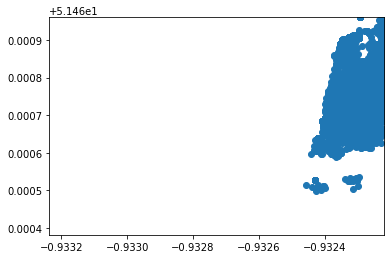

9c:8c:6e:46:1c:5e
92.30883609359496


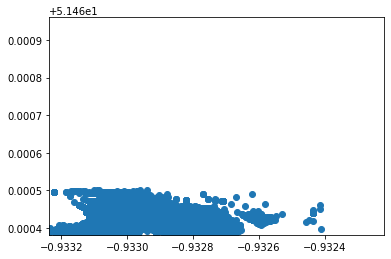

88:66:a5:45:b9:ea
127.85622492418467


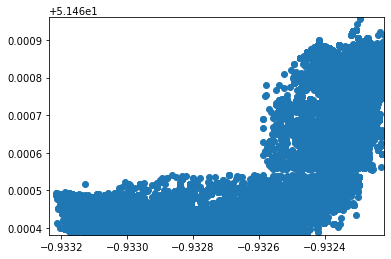

ac:d1:b8:03:40:8f
86.02421360782003


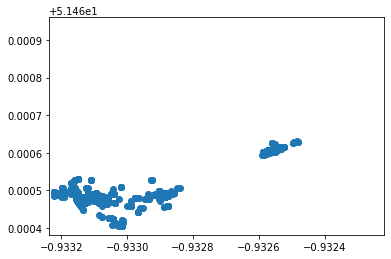

9c:8c:6e:46:01:f8
70.52782222039136


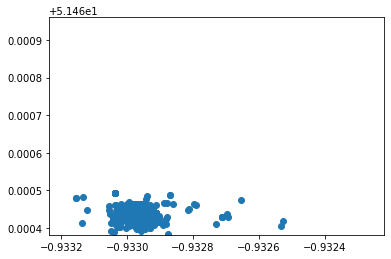

9c:8c:6e:46:0c:52
39.170657681097495


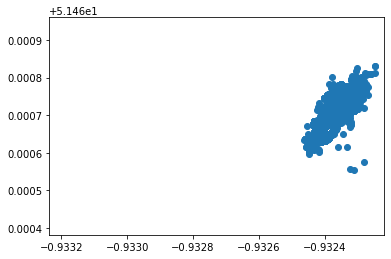

00:c2:c6:cc:a8:85
107.9945757716326


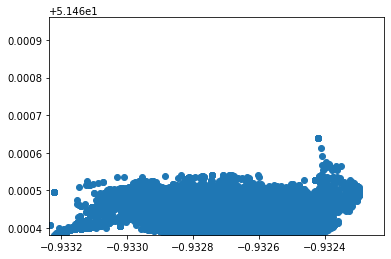

98:10:e8:3a:c9:e4
128.37634248986254


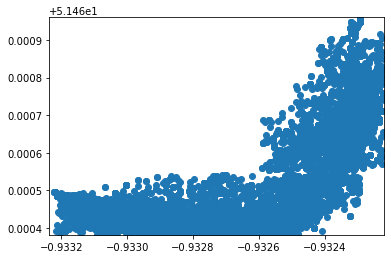

c4:6e:1f:1a:81:1d
115.10015181958742


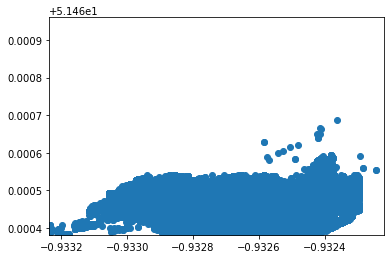

cc:c0:79:0b:9a:2a
35.28384591546263


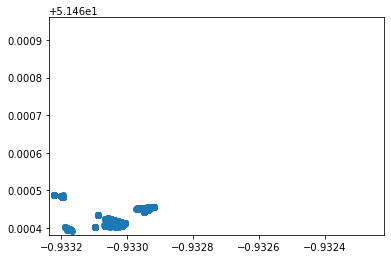

In [24]:
# Visualize the distance for weekend mac id
weekend_presence = np.array(df_weekend['ClientMacAddr'].head(10))
for i in weekend_presence :
    person = df[df['ClientMacAddr'] == i ]
    print(i)
    person_min_lng = min(person['lng'])
    person_max_lng = max(person['lng'])
    person_min_lat = min(person['lat'])
    person_max_lat = max(person['lat'])
    person_distance = 111139 * ((person_max_lng - person_min_lng)**2 + (person_max_lat - person_min_lat)**2)**0.5
    print(person_distance)
    plt.scatter(person['lng'], person['lat'])
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.show()

In [25]:
# Distribution for max distance
temp1 = df.groupby('ClientMacAddr')['lat'].agg(max_lat='max', min_lat='min').reset_index()
temp2 = df.groupby('ClientMacAddr')['lng'].agg(max_lng='max', min_lng='min').reset_index()
temp = temp1.merge(temp2, on='ClientMacAddr')
temp['Distance(Meter)'] = 111139*((temp['max_lat'] - temp['min_lat'])**2 + (temp['max_lng'] - temp['min_lng'])**2)**0.5
temp = temp.merge(frequency, on='ClientMacAddr')
temp.sort_values('Distance(Meter)', ascending = False)

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
6809  cc:73:14:60:68:97  51.460960  51.460382 -0.932221 -0.933236   
6433  bc:9f:ef:12:17:ff  51.460960  51.460382 -0.932221 -0.933236   
5474  98:10:e8:06:85:6a  51.460960  51.460382 -0.932221 -0.933236   
6286  b4:9c:df:55:39:9a  51.460960  51.460382 -0.932221 -0.933236   
6736  cc:44:63:32:20:55  51.460960  51.460382 -0.932221 -0.933236   
...                 ...        ...        ...       ...       ...   
7046  d0:77:14:27:38:e5  51.460447  51.460447 -0.932486 -0.932486   
7047  d0:77:14:27:4e:2f  51.460408  51.460408 -0.932772 -0.932772   
3666  80:58:f8:5d:59:8c  51.460491  51.460491 -0.932771 -0.932771   
7049  d0:77:14:27:a0:47  51.460528  51.460528 -0.932429 -0.932429   
4777  80:58:f8:f8:e1:01  51.460420  51.460420 -0.932617 -0.932617   

      Distance(Meter)  total_day  total_signal  
6809       129.879876         50         85442  
6433       129.873532         45         86359  
5474       129.861023         37         68172  
6286       129.845072         17         17731  
6736       129.793080         33         60409  
...               ...        ...           ...  
7046         0.000000          1            12  
7047         0.000000          1            13  
3666         0.000000          1            14  
7049         0.000000          1            13  
4777         0.000000          1            14  

[9554 rows x 8 columns]

In [26]:
# Add Weekdays and Weekend
df_temp = temp.merge(df_weekday, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekday'})
df_temp = df_temp.merge(df_weekend, how='left', on = 'ClientMacAddr').fillna(0).rename(columns = {'Days':'Weekend'})

## Remove outliers: remove ClientMacAddr that has only 1 signal (row)
df_temp = df_temp.loc[df_temp['total_signal'] > 1,:]
df_temp

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
0     00:08:22:00:b9:fb  51.460393  51.460393 -0.932497 -0.932497   
2     00:08:22:0e:c4:fb  51.460420  51.460420 -0.932617 -0.932617   
3     00:08:22:20:bc:fb  51.460448  51.460382 -0.932492 -0.932658   
4     00:08:22:24:b7:fb  51.460696  51.460633 -0.932276 -0.932314   
5     00:08:22:24:bd:fb  51.460389  51.460383 -0.932539 -0.932548   
...                 ...        ...        ...       ...       ...   
9549  fc:a6:67:be:c0:a5  51.460960  51.460388 -0.932222 -0.932771   
9550  fc:d8:48:80:ab:de  51.460513  51.460386 -0.932489 -0.933054   
9551  fc:db:b3:31:4e:a8  51.460411  51.460411 -0.933036 -0.933036   
9552  fc:f8:ae:5a:6f:ea  51.460608  51.460410 -0.932323 -0.932448   
9553  fc:fc:48:36:16:6b  51.460906  51.460602 -0.932221 -0.932423   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  
0            0.085973          1            13      1.0      0.0  
2            0.000000          1             2      1.0      0.0  
3           19.917625          1             6      1.0      0.0  
4            8.172743          1            11      1.0      0.0  
5            1.212654          1             2      1.0      0.0  
...               ...        ...           ...      ...      ...  
9549        88.129586          6           438      6.0      0.0  
9550        64.369748          2           315      2.0      0.0  
9551         0.000000          1            13      1.0      0.0  
9552        26.020636          1           321      1.0      0.0  
9553        40.561440          1           114      1.0      0.0  

[9225 rows x 10 columns]

In [27]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9225 entries, 0 to 9553
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ClientMacAddr    9225 non-null   object 
 1   max_lat          9225 non-null   float64
 2   min_lat          9225 non-null   float64
 3   max_lng          9225 non-null   float64
 4   min_lng          9225 non-null   float64
 5   Distance(Meter)  9225 non-null   float64
 6   total_day        9225 non-null   int64  
 7   total_signal     9225 non-null   int64  
 8   Weekday          9225 non-null   float64
 9   Weekend          9225 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 792.8+ KB


## Visualize the data

array([[<AxesSubplot:title={'center':'Distance(Meter)'}>]], dtype=object)

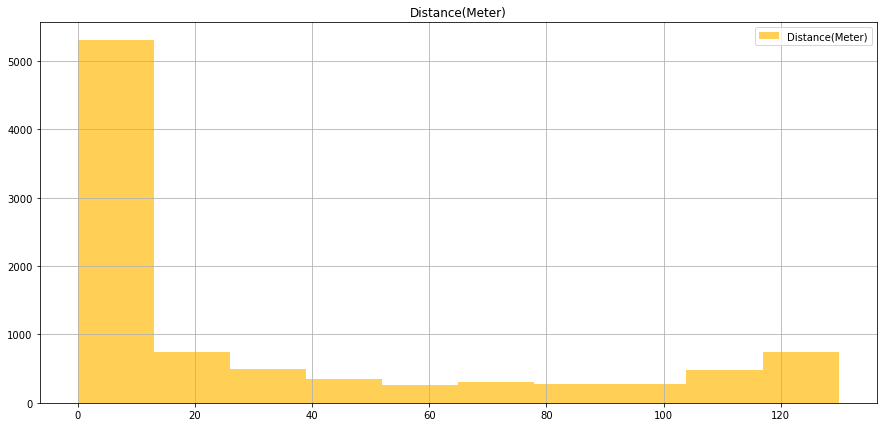

In [28]:
df_temp.hist(column='Distance(Meter)',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

array([[<AxesSubplot:title={'center':'total_day'}>]], dtype=object)

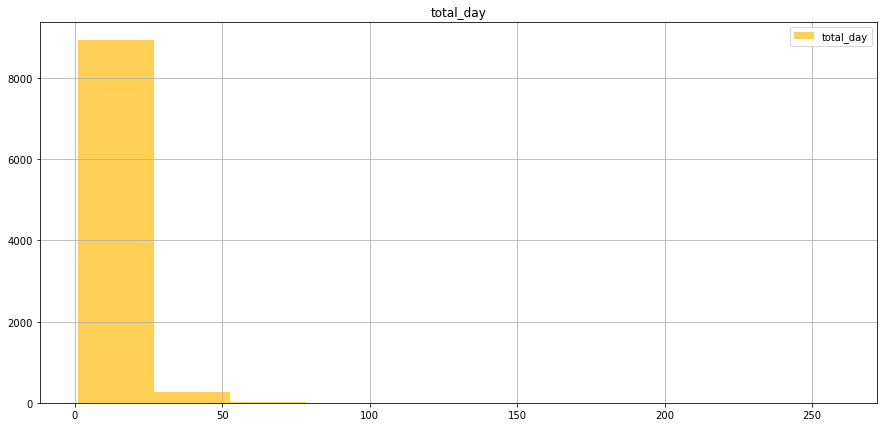

In [29]:
df_temp.hist(column='total_day',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56',
             bins=10)

array([[<AxesSubplot:title={'center':'total_signal'}>]], dtype=object)

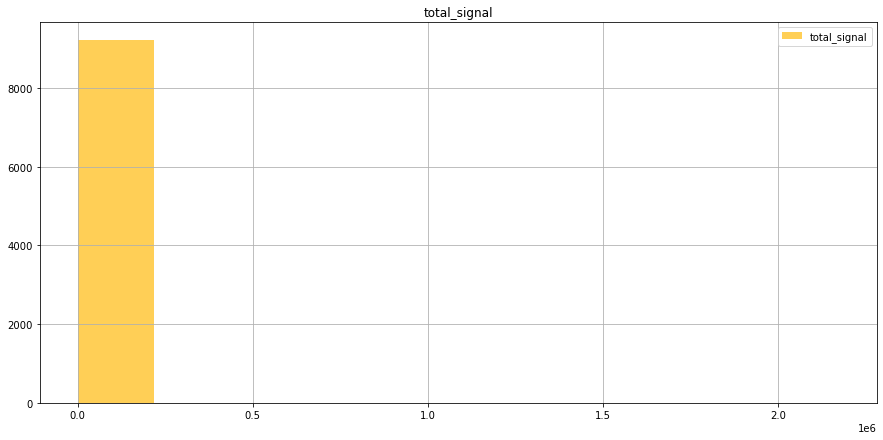

In [30]:
df_temp.hist(column='total_signal',
             figsize=(15, 7),
             legend=True,
             color='#FFCF56')

In [31]:
df_temp.describe()

max_lat      min_lat      max_lng      min_lng  Distance(Meter)  \
count  9225.000000  9225.000000  9225.000000  9225.000000      9225.000000   
mean     51.460609    51.460480    -0.932562    -0.932803        31.216564   
std       0.000197     0.000136     0.000316     0.000313        43.012270   
min      51.460381    51.460381    -0.933235    -0.933236         0.000000   
25%      51.460445    51.460394    -0.932877    -0.933039         0.000000   
50%      51.460494    51.460420    -0.932443    -0.932890         5.967564   
75%      51.460775    51.460491    -0.932252    -0.932517        53.413980   
max      51.460960    51.460960    -0.932221    -0.932223       129.879876   

         total_day  total_signal      Weekday      Weekend  
count  9225.000000  9.225000e+03  9225.000000  9225.000000  
mean      3.818970  3.717103e+03     3.732791     0.086179  
std       8.731763  3.712307e+04     8.059880     1.436367  
min       1.000000  2.000000e+00     0.000000     0.000000  
25%       1.000000  1.300000e+01     1.000000     0.000000  
50%       1.000000  1.300000e+01     1.000000     0.000000  
75%       2.000000  1.550000e+02     2.000000     0.000000  
max     259.000000  2.172994e+06   187.000000    72.000000

## Define the characteristics of Mac ID


Fixed device: Distance < 5 meters
- Machinery

Mobile device: Distance >= 5 meters 
- Engineers
- IT Technicians
- Visitors
- Intruders
- Security Guards
- Canteen Workers
- Machine Operators
- Vehicles


In [32]:
# Define the Job function
df_temp['Mobile_or_fixed'] = 'Mobile Device'
df_temp.loc[df_temp['Distance(Meter)']<5, 'Mobile_or_fixed'] = 'Fixed Device'
df_temp

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
0     00:08:22:00:b9:fb  51.460393  51.460393 -0.932497 -0.932497   
2     00:08:22:0e:c4:fb  51.460420  51.460420 -0.932617 -0.932617   
3     00:08:22:20:bc:fb  51.460448  51.460382 -0.932492 -0.932658   
4     00:08:22:24:b7:fb  51.460696  51.460633 -0.932276 -0.932314   
5     00:08:22:24:bd:fb  51.460389  51.460383 -0.932539 -0.932548   
...                 ...        ...        ...       ...       ...   
9549  fc:a6:67:be:c0:a5  51.460960  51.460388 -0.932222 -0.932771   
9550  fc:d8:48:80:ab:de  51.460513  51.460386 -0.932489 -0.933054   
9551  fc:db:b3:31:4e:a8  51.460411  51.460411 -0.933036 -0.933036   
9552  fc:f8:ae:5a:6f:ea  51.460608  51.460410 -0.932323 -0.932448   
9553  fc:fc:48:36:16:6b  51.460906  51.460602 -0.932221 -0.932423   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
0            0.085973          1            13      1.0      0.0   
2            0.000000          1             2      1.0      0.0   
3           19.917625          1             6      1.0      0.0   
4            8.172743          1            11      1.0      0.0   
5            1.212654          1             2      1.0      0.0   
...               ...        ...           ...      ...      ...   
9549        88.129586          6           438      6.0      0.0   
9550        64.369748          2           315      2.0      0.0   
9551         0.000000          1            13      1.0      0.0   
9552        26.020636          1           321      1.0      0.0   
9553        40.561440          1           114      1.0      0.0   

     Mobile_or_fixed  
0       Fixed Device  
2       Fixed Device  
3      Mobile Device  
4      Mobile Device  
5       Fixed Device  
...              ...  
9549   Mobile Device  
9550   Mobile Device  
9551    Fixed Device  
9552   Mobile Device  
9553   Mobile Device  

[9225 rows x 11 columns]

In [33]:
df_temp["Mobile_or_fixed"].value_counts()

Mobile Device    4766
Fixed Device     4459
Name: Mobile_or_fixed, dtype: int64

### Fixed Device

In [34]:
#Select fixed device
Fix_device = df_temp[df_temp['Mobile_or_fixed']=='Fixed Device'].sort_values('Distance(Meter)', ascending=False)
Fix_device

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
4452  80:58:f8:cc:10:67  51.460600  51.460574 -0.932327 -0.932364   
7520  d0:77:14:7f:b9:2c  51.460494  51.460474 -0.933169 -0.933209   
3800  80:58:f8:70:0f:66  51.460492  51.460448 -0.933030 -0.933038   
7446  d0:77:14:74:85:9d  51.460494  51.460478 -0.933179 -0.933221   
8218  d0:77:14:ff:47:71  51.460457  51.460433 -0.932919 -0.932956   
...                 ...        ...        ...       ...       ...   
3982  80:58:f8:8b:3d:02  51.460528  51.460528 -0.932429 -0.932429   
3984  80:58:f8:8b:3d:cb  51.460528  51.460528 -0.932429 -0.932429   
3985  80:58:f8:8b:61:4a  51.460528  51.460528 -0.932429 -0.932429   
3986  80:58:f8:8b:ab:94  51.460404  51.460404 -0.933021 -0.933021   
9551  fc:db:b3:31:4e:a8  51.460411  51.460411 -0.933036 -0.933036   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
4452         4.997148          1            13      1.0      0.0   
7520         4.988431          1            13      1.0      0.0   
3800         4.977924          1            13      1.0      0.0   
7446         4.975688          1            13      1.0      0.0   
8218         4.960126          1            14      1.0      0.0   
...               ...        ...           ...      ...      ...   
3982         0.000000          1             7      1.0      0.0   
3984         0.000000          1             7      1.0      0.0   
3985         0.000000          1            14      1.0      0.0   
3986         0.000000          1            12      1.0      0.0   
9551         0.000000          1            13      1.0      0.0   

     Mobile_or_fixed  
4452    Fixed Device  
7520    Fixed Device  
3800    Fixed Device  
7446    Fixed Device  
8218    Fixed Device  
...              ...  
3982    Fixed Device  
3984    Fixed Device  
3985    Fixed Device  
3986    Fixed Device  
9551    Fixed Device  

[4459 rows x 11 columns]

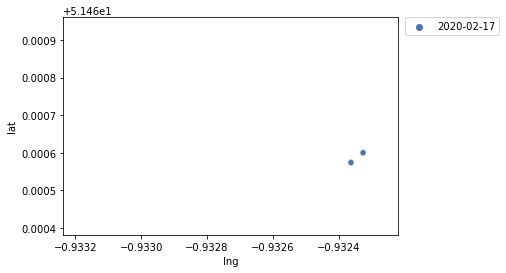

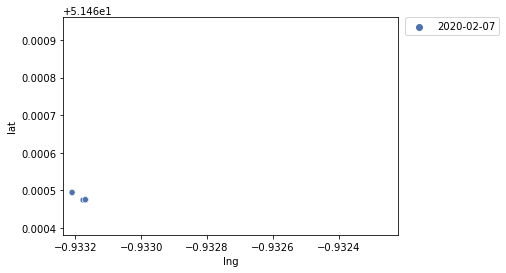

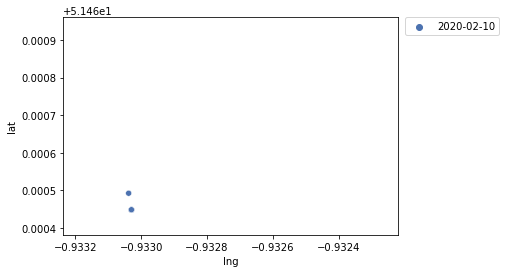

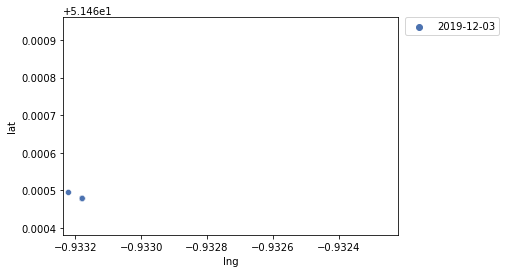

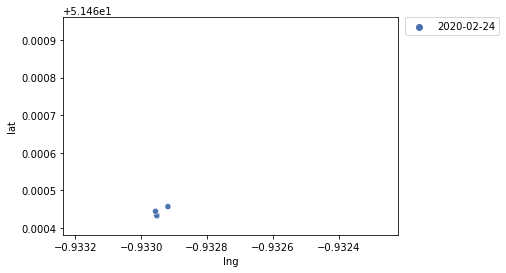

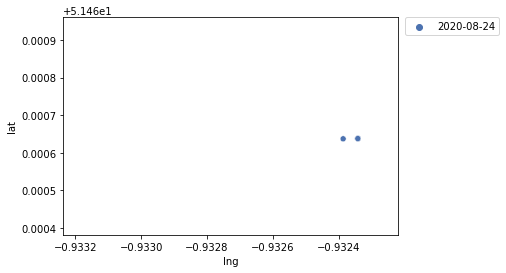

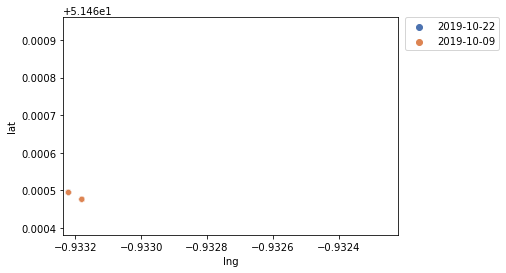

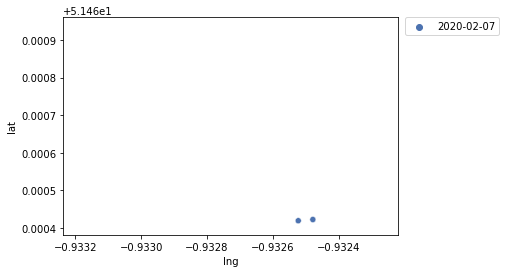

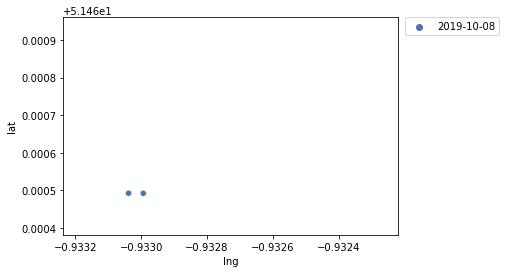

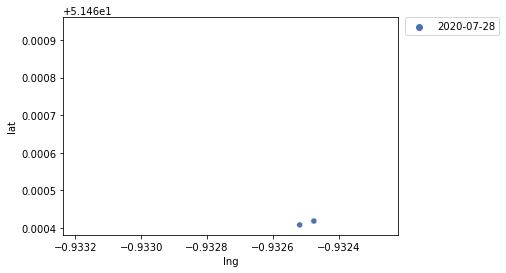

In [35]:
# Assign color for different days
top10_fix = np.array(Fix_device['ClientMacAddr'])[:10]

# print(top10_fix)
for i in top10_fix:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Mobile Device

In [36]:
# Create mobile device df
Mobile_device = df_temp[df_temp['Mobile_or_fixed']=='Mobile Device'].sort_values('Distance(Meter)', ascending=False)
print(Mobile_device.shape)
Mobile_device.head()

(4766, 11)


ClientMacAddr   max_lat    min_lat   max_lng   min_lng  \
6809  cc:73:14:60:68:97  51.46096  51.460382 -0.932221 -0.933236   
6433  bc:9f:ef:12:17:ff  51.46096  51.460382 -0.932221 -0.933236   
5474  98:10:e8:06:85:6a  51.46096  51.460382 -0.932221 -0.933236   
6286  b4:9c:df:55:39:9a  51.46096  51.460382 -0.932221 -0.933236   
6736  cc:44:63:32:20:55  51.46096  51.460382 -0.932221 -0.933236   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
6809       129.879876         50         85442     50.0      0.0   
6433       129.873532         45         86359     45.0      0.0   
5474       129.861023         37         68172     37.0      0.0   
6286       129.845072         17         17731     17.0      0.0   
6736       129.793080         33         60409     33.0      0.0   

     Mobile_or_fixed  
6809   Mobile Device  
6433   Mobile Device  
5474   Mobile Device  
6286   Mobile Device  
6736   Mobile Device

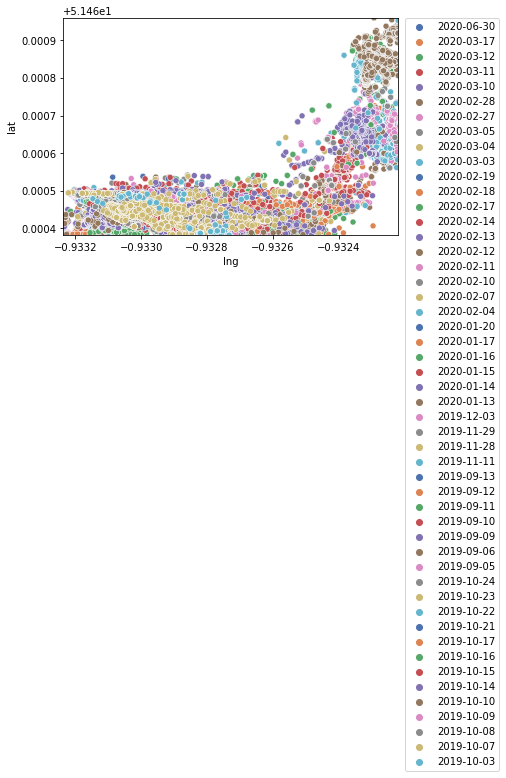

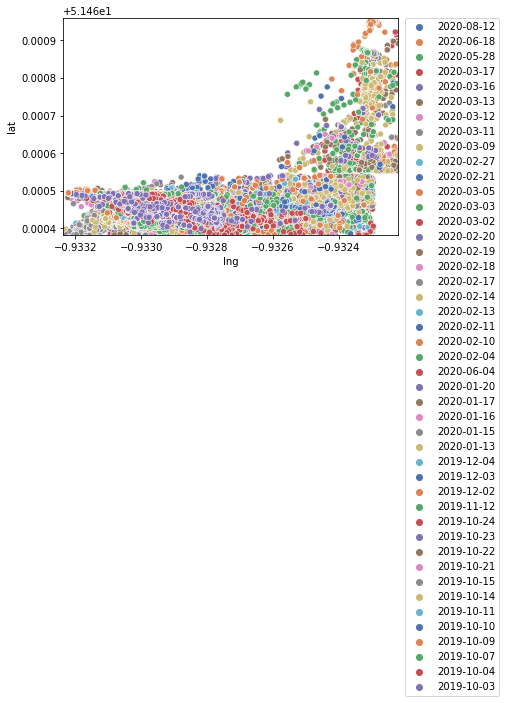

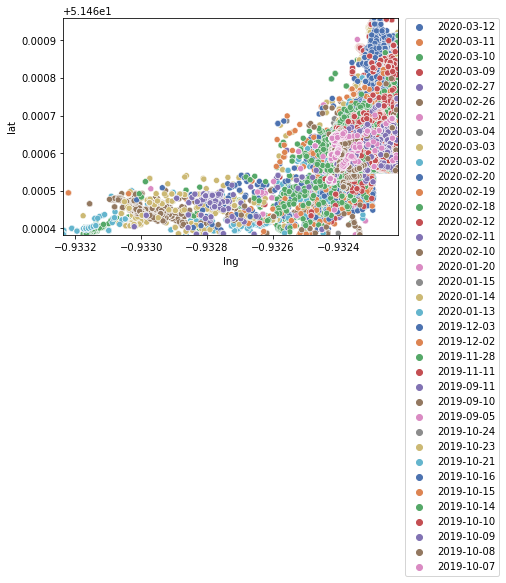

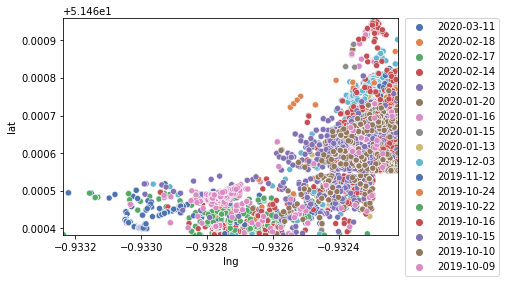

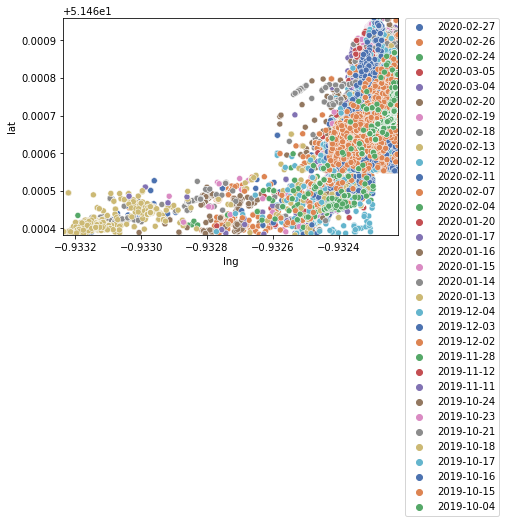

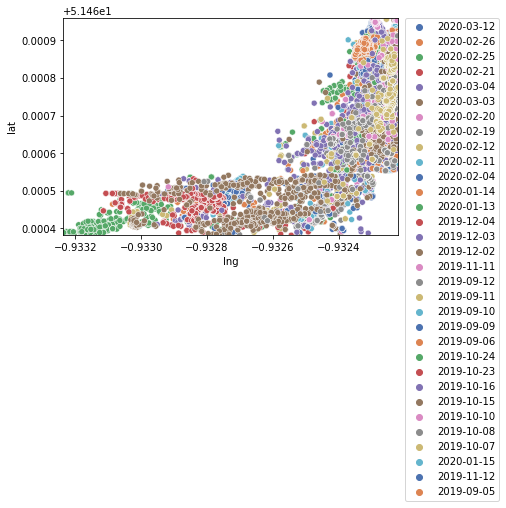

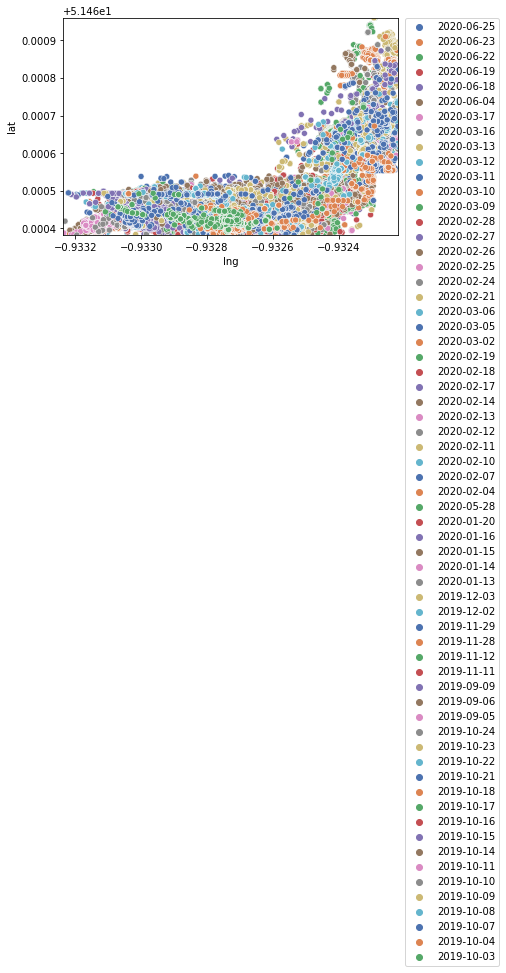

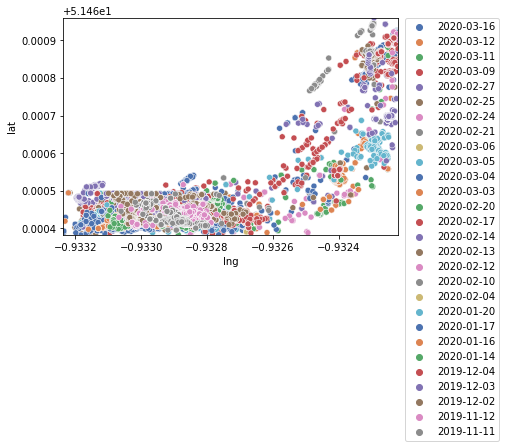

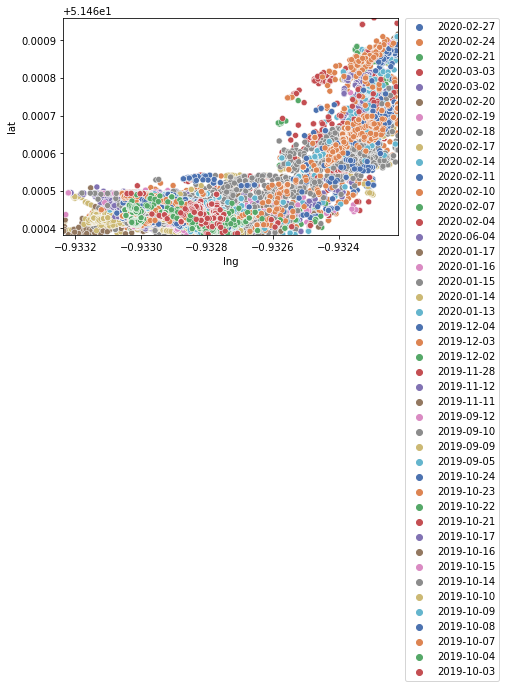

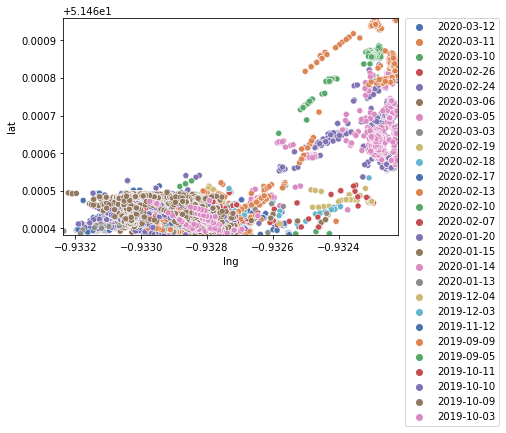

In [37]:
# Assign color for different days
top10_mobile = np.array(Mobile_device['ClientMacAddr'])[:10]

# print(top10_fix)
for i in top10_mobile:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Filter out mac id that occur in the designed space

In [38]:
df_office = df.query("lat>=51.46086267643394 and lat<=51.46093167542239")
df_office = df_office.query("lng>=-0.93233819710921 and lng<=-0.9322256859342483")
unique_office_mac = df_office["ClientMacAddr"].unique()
len(unique_office_mac)

1330

1294
c0:b6:58:a2:3c:78


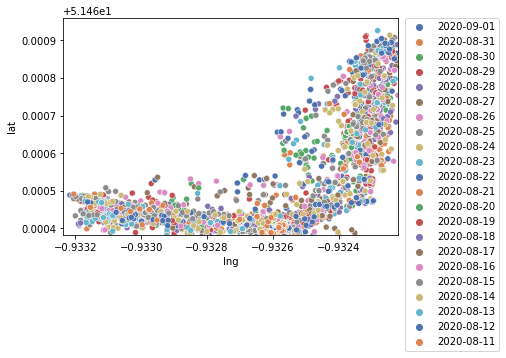

b4:9c:df:63:d2:20


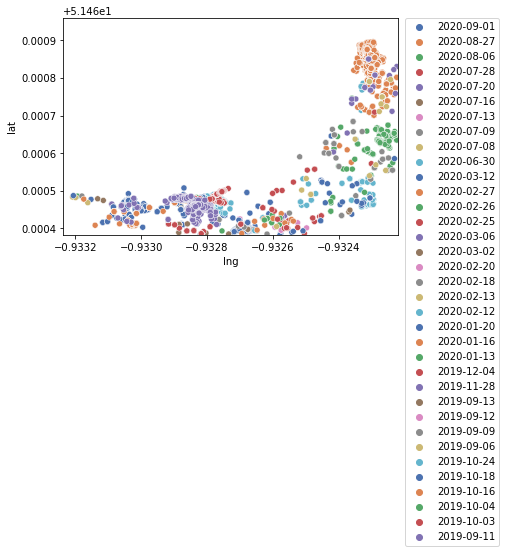

1c:5c:f2:f3:7a:fd


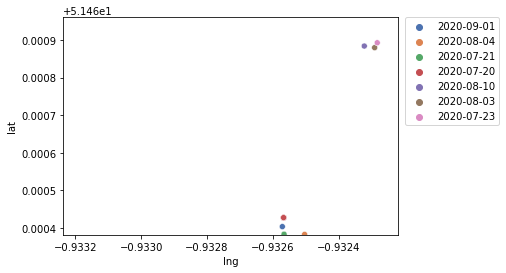

88:66:a5:da:26:f7


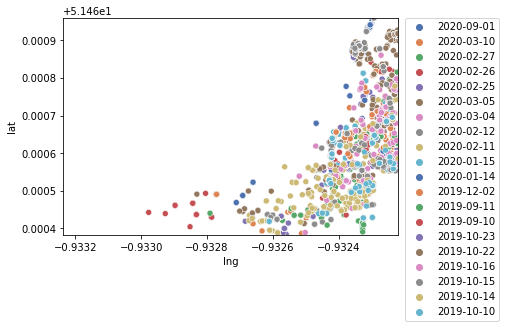

b4:9c:df:31:89:ea


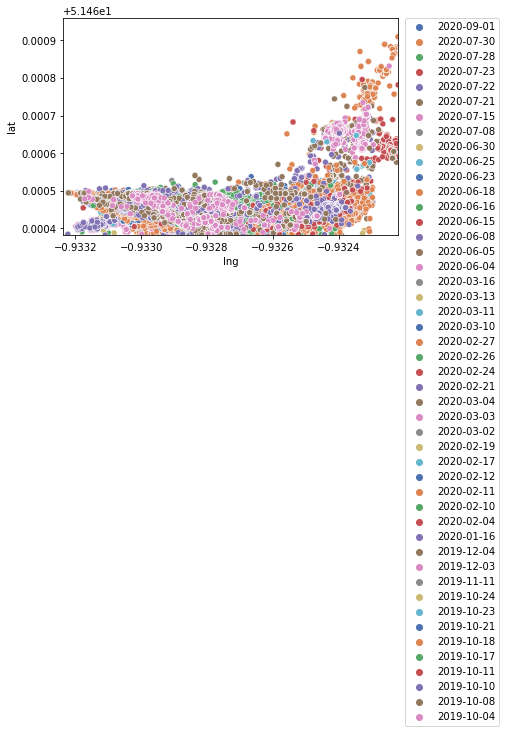

90:61:ae:25:4e:6e


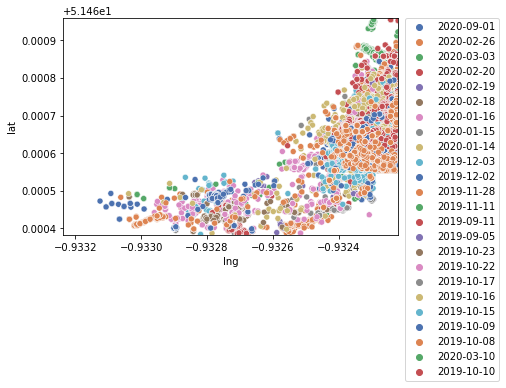

88:66:a5:55:20:94


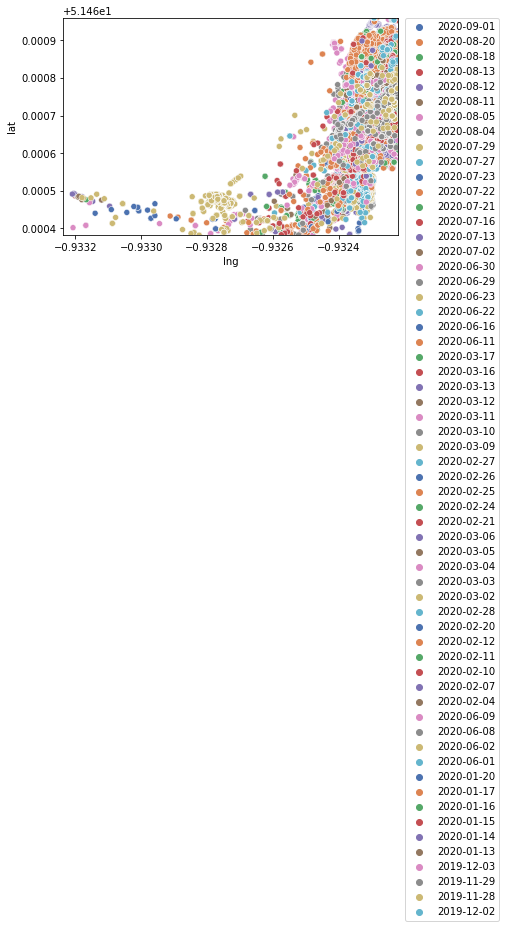

98:10:e8:06:8e:52


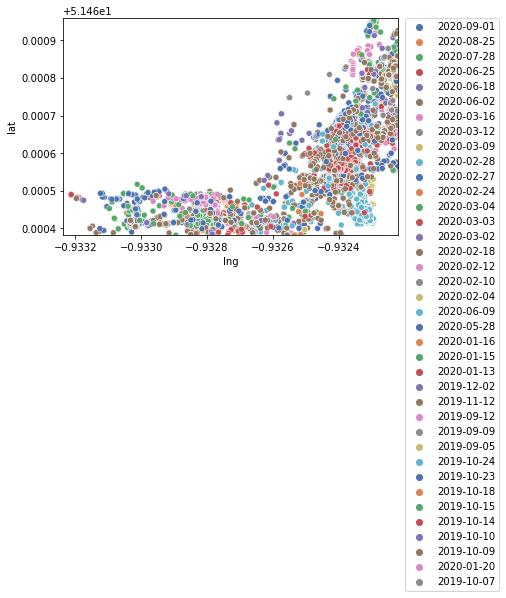

88:66:a5:55:52:f9


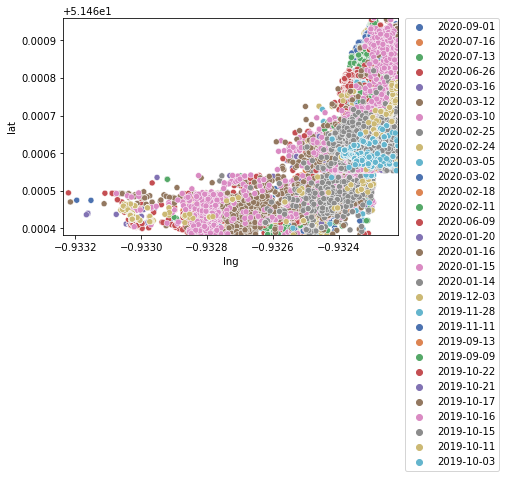

cc:44:63:22:a6:39


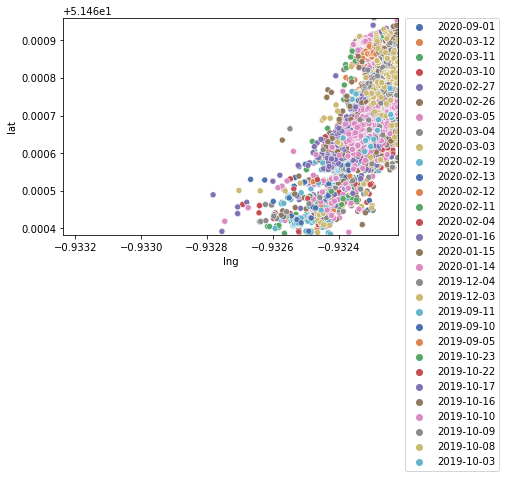

88:66:a5:10:be:cb


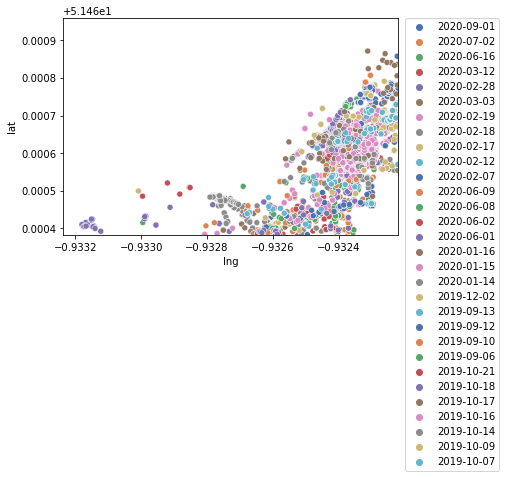

8c:f5:a3:cd:d2:db


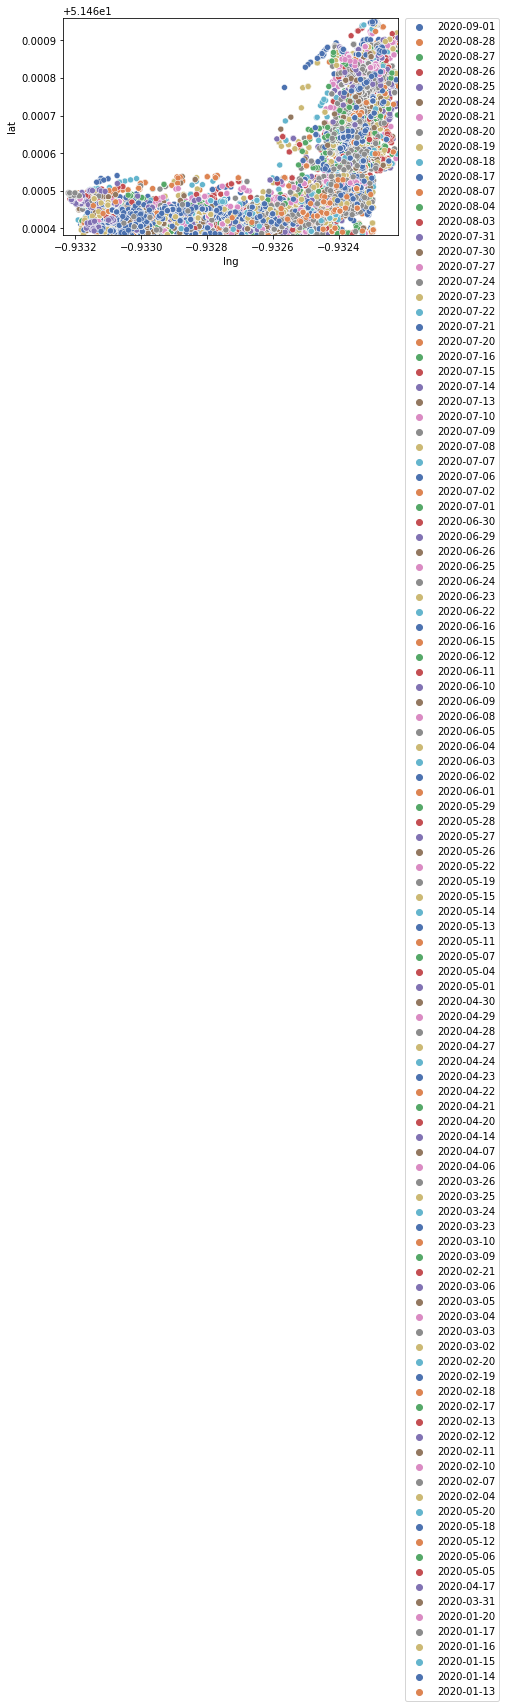

9c:8c:6e:46:0b:7c


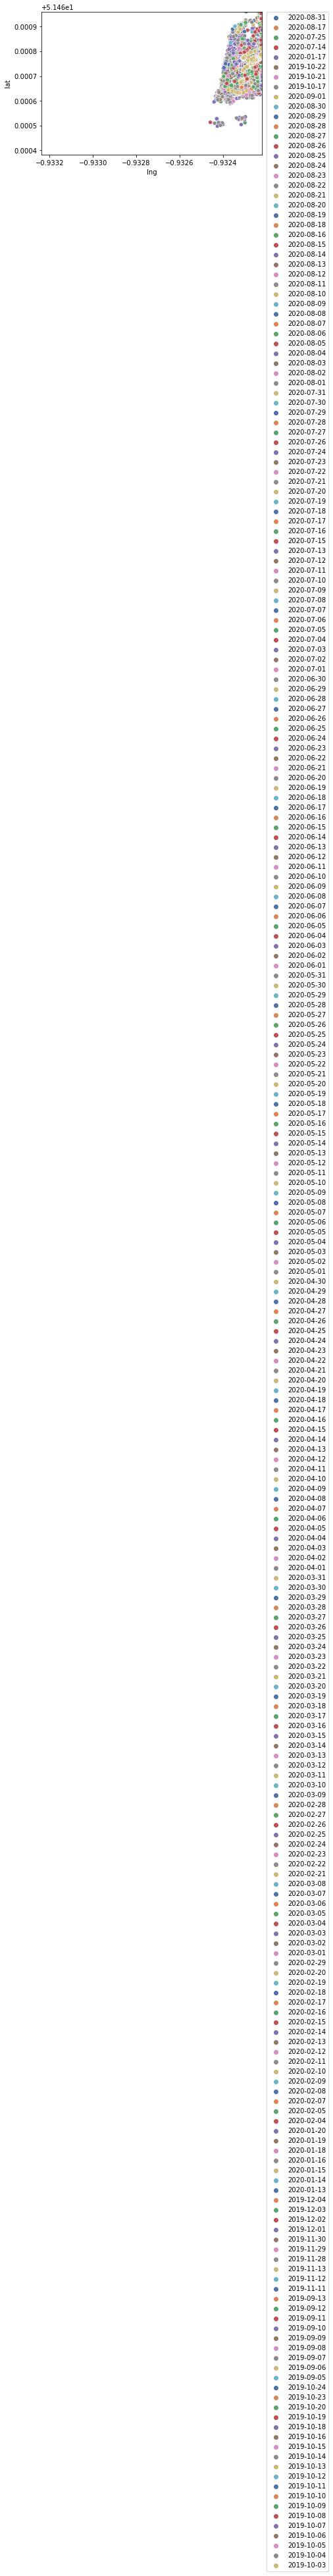

b4:ef:39:c3:4a:2a


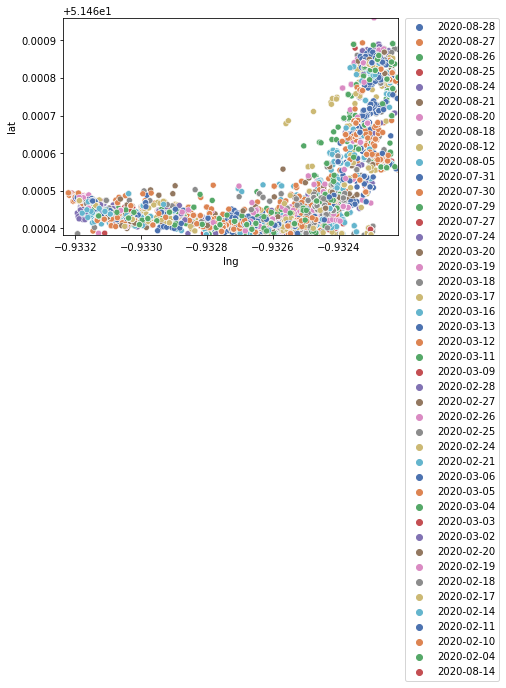

60:e3:ac:be:c5:56


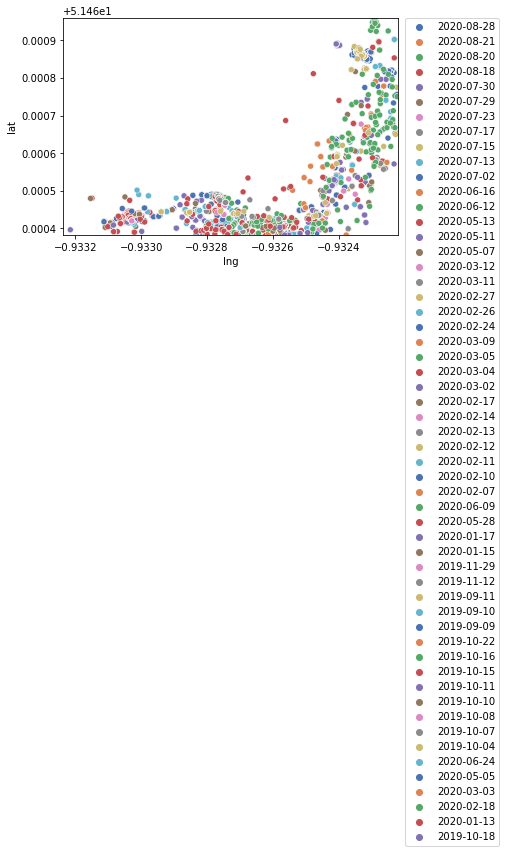

9c:da:3e:80:28:c0


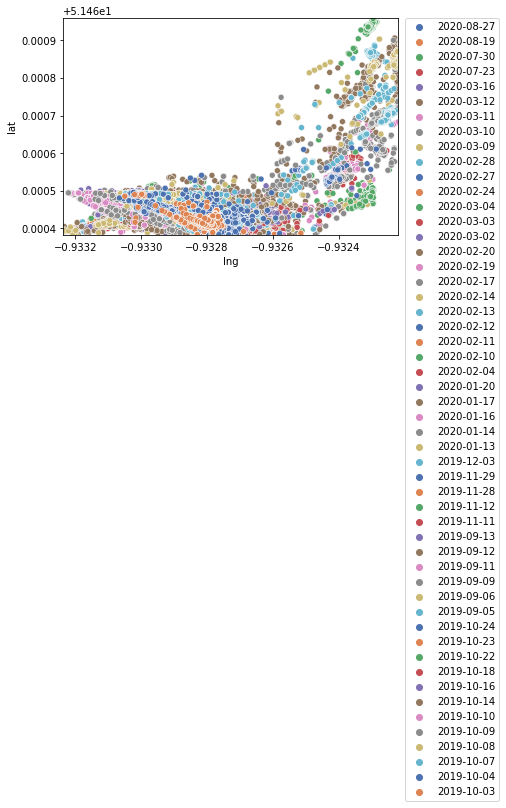

88:66:a5:37:7d:95


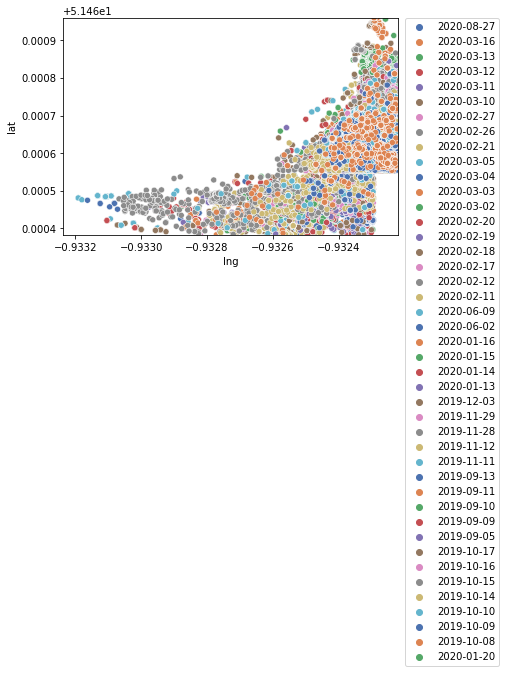

98:10:e8:08:43:ef


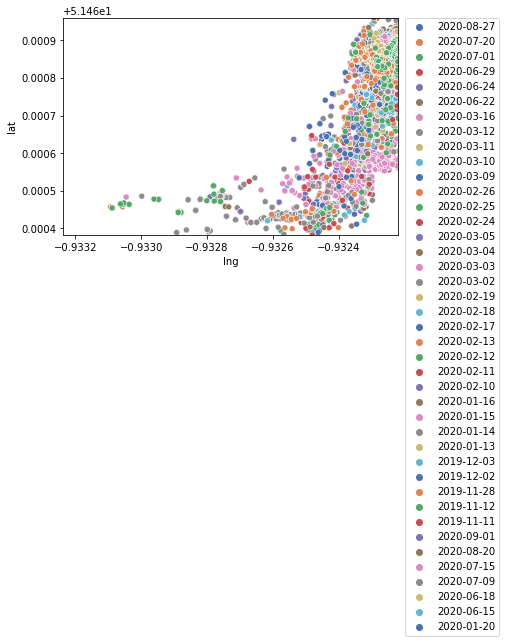

ec:9b:f3:07:70:0c


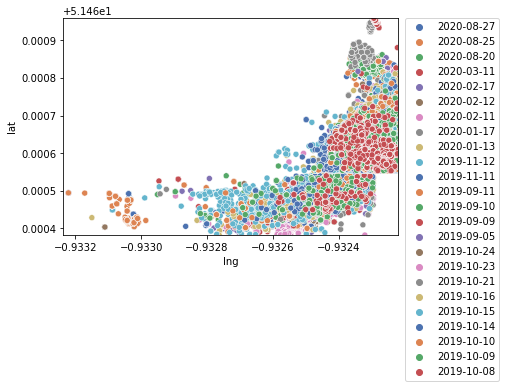

58:e2:8f:c1:61:17


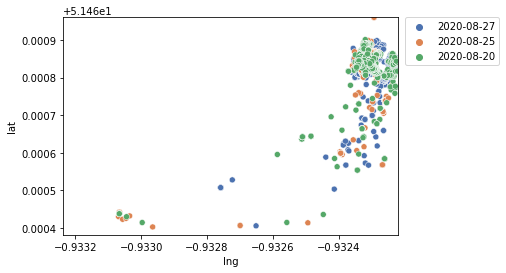

In [39]:
# Select mac id that is mobile, occurs in the designed area, and weekday only
df_office = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['ClientMacAddr'].isin(unique_office_mac)) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
print(len(df_office["ClientMacAddr"].unique()))

# Pick only 20 mac id
for i in df_office["ClientMacAddr"].unique()[:20]:
    print(i)
    person = df[df['ClientMacAddr'] == i]
    # Color category by date
    sns.scatterplot(x="lng", y="lat", data=person, hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

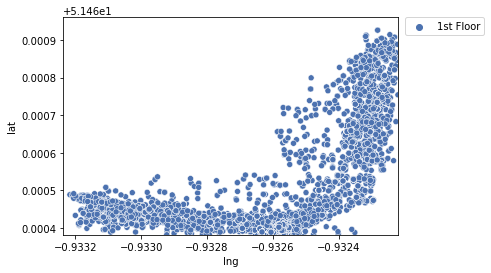

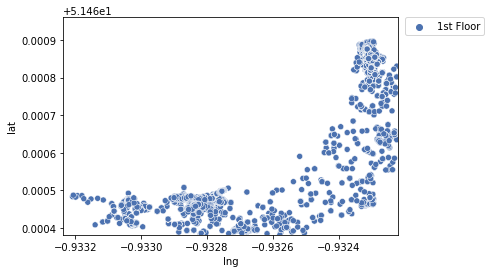

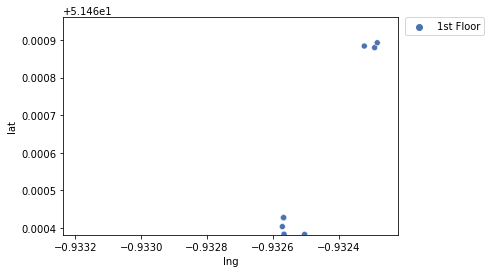

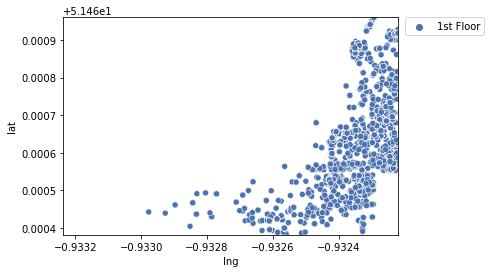

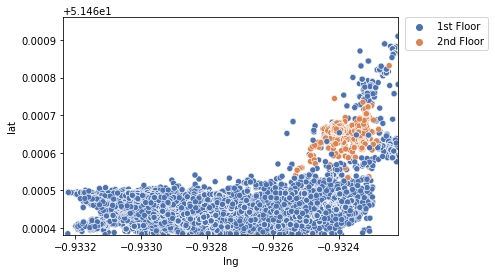

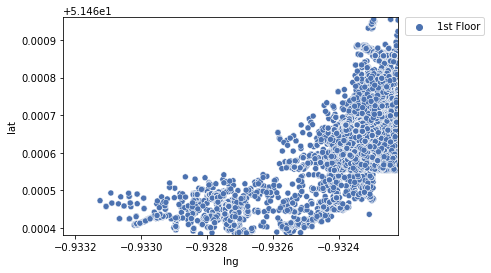

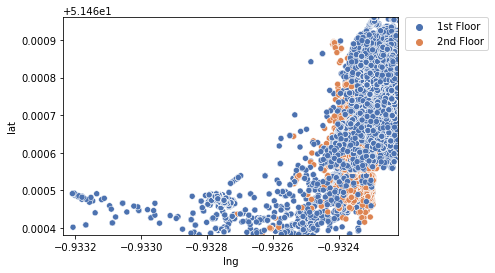

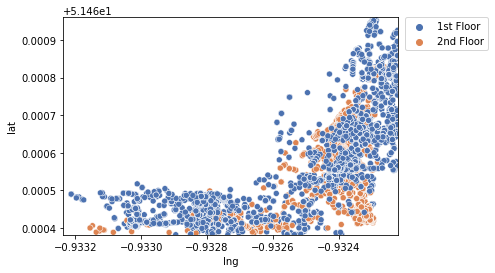

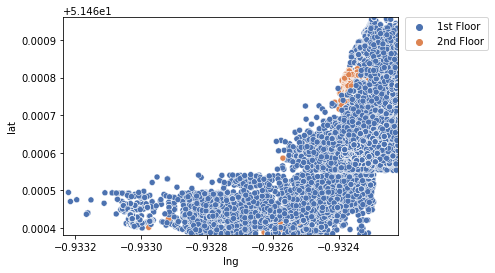

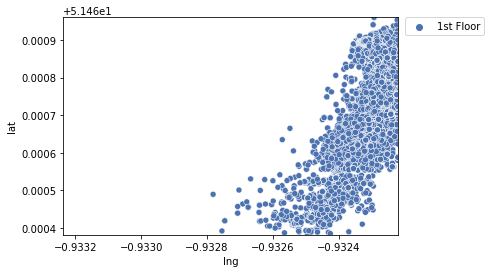

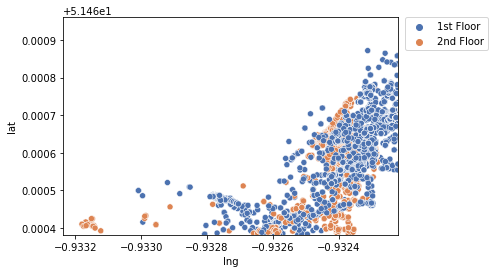

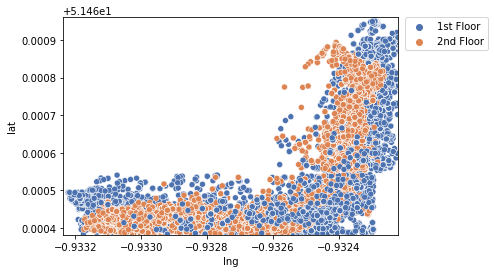

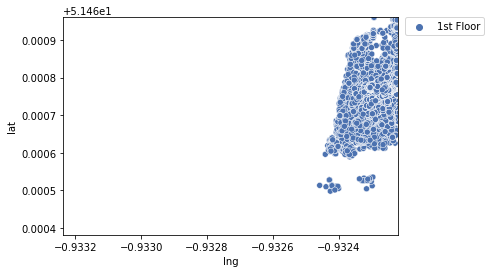

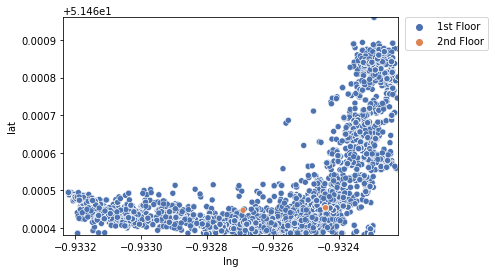

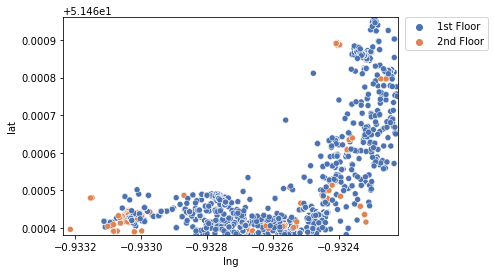

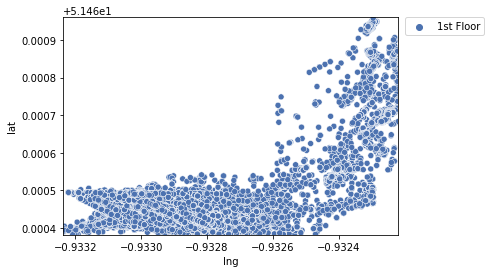

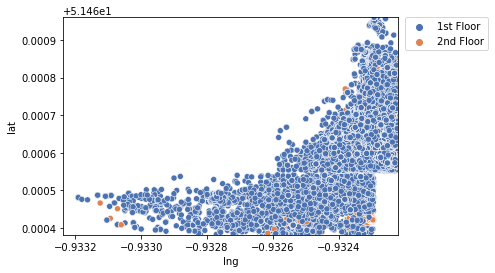

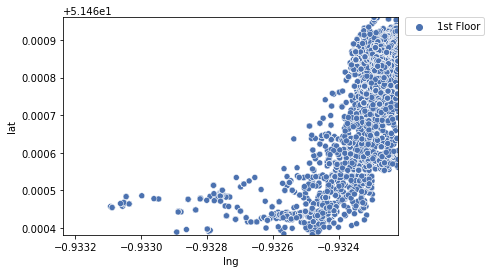

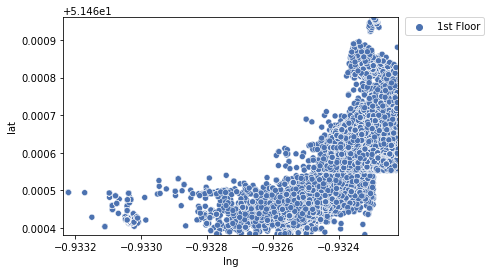

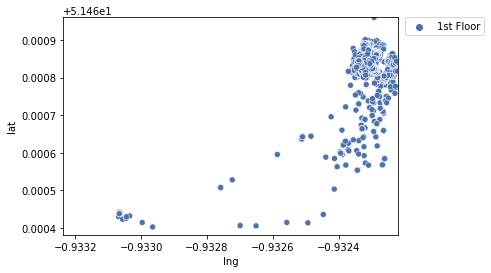

In [40]:
# Plot the category color by level, not date
for i in df_office["ClientMacAddr"].unique()[:20]:
    person = df[df['ClientMacAddr'] == i]
    sns.scatterplot(x="lng", y="lat", data=person, hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

In [41]:
# bottom_left_it_office = 51.460829310334326, -0.9325432832801082
# top_right_it_office   = 51.46095700368193, -0.9322479152569846

# bottom_left_engineer_room = 51.46062086895524, -0.9325704089148847
# top_right_engineer_room   = 51.460739173638565, -0.9322961386076987

# bottom_left_entrance = 51.46039535635214, -0.9325788352265879
# top_right_entrance = 51.46050255994146, -0.9323193329736676

# bottom_left_canteen = 51.46042877285531, -0.9332653621565505
# top_right_canteen = 51.46048718462074, -0.9328699790307564

# bottom_left_conference_rooms = 51.46053543776189, -0.9332449815830561
# top_right_conference_rooms = 51.46056005640908, -0.9327219498297091

## Count number of signals that belong to designated areas (2nd Floor)

In [42]:
## Select only 2nd floor, mobile mac id, and weekday data
df_mobile = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["2nd Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile

Site      Level      ClientMacAddr        lat       lng  \
9502669   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502670   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502671   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502672   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502673   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
...             ...        ...                ...        ...       ...   
28601966  UK Office  2nd Floor  bc:b8:63:9f:29:b4  51.460893 -0.932415   
28601967  UK Office  2nd Floor  bc:b8:63:9f:29:b4  51.460893 -0.932415   
28601968  UK Office  2nd Floor  e8:de:27:9f:7f:0c  51.460579 -0.932417   
28601969  UK Office  2nd Floor  9c:8c:6e:46:0c:52  51.460732 -0.932355   
28601970  UK Office  2nd Floor  9c:8c:6e:46:0c:52  51.460732 -0.932355   

                                localtime                  normalized_time  \
9502669  2020-06-10 12:51:24.704000+00:00 2020-06-10 12:51:24.704000+00:00   
9502670  2020-06-10 12:51:19.490000+00:00 2020-06-10 12:51:19.490000+00:00   
9502671  2020-06-10 12:51:09.136000+00:00 2020-06-10 12:51:09.136000+00:00   
9502672  2020-06-10 12:50:56.894000+00:00 2020-06-10 12:50:56.894000+00:00   
9502673  2020-06-10 12:50:48.849000+00:00 2020-06-10 12:50:48.849000+00:00   
...                                   ...                              ...   
28601966 2020-03-20 07:45:14.407000+00:00 2020-03-20 07:45:14.407000+00:00   
28601967 2020-03-20 07:45:08.252000+00:00 2020-03-20 07:45:08.252000+00:00   
28601968 2020-03-20 07:45:05.384000+00:00 2020-03-20 07:45:05.384000+00:00   
28601969 2020-03-20 07:45:05.096000+00:00 2020-03-20 07:45:05.096000+00:00   
28601970 2020-03-20 07:44:59.898000+00:00 2020-03-20 07:44:59.898000+00:00   

                date      time  dayOfWeek  IsWeekend  
9502669   2020-06-10  12:51:24          2      False  
9502670   2020-06-10  12:51:19          2      False  
9502671   2020-06-10  12:51:09          2      False  
9502672   2020-06-10  12:50:56          2      False  
9502673   2020-06-10  12:50:48          2      False  
...              ...       ...        ...        ...  
28601966  2020-03-20  07:45:14          4      False  
28601967  2020-03-20  07:45:08          4      False  
28601968  2020-03-20  07:45:05          4      False  
28601969  2020-03-20  07:45:05          4      False  
28601970  2020-03-20  07:44:59          4      False  

[3092730 rows x 11 columns]

In [43]:
def find_designated_space(lat, lng):
    designated_space = 'Not in any'
    bottom_left_it_office = (51.46079754688419, -0.932543300159931)
    top_right_it_office   = (51.46098040420442, -0.9322317891150113)

    bottom_left_engineer_room = (51.46053965077327, -0.9325912535330138)
    top_right_engineer_room   = (51.46076277798453, -0.9322830982136779)

    bottom_left_entrance = (51.46030604220702, -0.932772184478665)
    top_right_entrance = (51.46042969133505, -0.9325039535328952)
    

    bottom_left_canteen = (51.46037535823833, -0.933292264577848)
    top_right_canteen = (51.46045878152074, -0.9327547136518658)

    bottom_left_conference_rooms = (51.460503615959965, -0.9332691578318232)
    top_right_conference_rooms = (51.46056710279871, -0.9325986479131928)

    
    if lat >= bottom_left_it_office[0] and lat <= top_right_it_office[0] and lng >= bottom_left_it_office[1] and lng <= top_right_it_office[1]:
        designated_space = 'it_office'
    elif lat >= bottom_left_engineer_room[0] and lat <= top_right_engineer_room[0] and lng >= bottom_left_engineer_room[1] and lng <= top_right_engineer_room[1]:
        designated_space = 'engineering_room'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_conference_rooms[0] and lat <= top_right_conference_rooms[0] and lng >= bottom_left_conference_rooms[1] and lng <= top_right_conference_rooms[1]:
        designated_space = 'conference'
    else:
        designated_space = 'not_in_any'
    
    return designated_space


In [44]:
df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)
df_mobile['designated_space'].value_counts()

<ipython-input-44-a368c6c7d359>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile['designated_space'] = df_mobile.apply(lambda x: find_designated_space(x['lat'], x['lng']), axis=1)


engineering_room    1147664
canteen              845346
it_office            554180
entrance             389881
not_in_any           155237
conference              422
Name: designated_space, dtype: int64

In [45]:
df_mobile

Site      Level      ClientMacAddr        lat       lng  \
9502669   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502670   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502671   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502672   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
9502673   UK Office  2nd Floor  9c:8c:6e:46:01:f8  51.460444 -0.932935   
...             ...        ...                ...        ...       ...   
28601966  UK Office  2nd Floor  bc:b8:63:9f:29:b4  51.460893 -0.932415   
28601967  UK Office  2nd Floor  bc:b8:63:9f:29:b4  51.460893 -0.932415   
28601968  UK Office  2nd Floor  e8:de:27:9f:7f:0c  51.460579 -0.932417   
28601969  UK Office  2nd Floor  9c:8c:6e:46:0c:52  51.460732 -0.932355   
28601970  UK Office  2nd Floor  9c:8c:6e:46:0c:52  51.460732 -0.932355   

                                localtime                  normalized_time  \
9502669  2020-06-10 12:51:24.704000+00:00 2020-06-10 12:51:24.704000+00:00   
9502670  2020-06-10 12:51:19.490000+00:00 2020-06-10 12:51:19.490000+00:00   
9502671  2020-06-10 12:51:09.136000+00:00 2020-06-10 12:51:09.136000+00:00   
9502672  2020-06-10 12:50:56.894000+00:00 2020-06-10 12:50:56.894000+00:00   
9502673  2020-06-10 12:50:48.849000+00:00 2020-06-10 12:50:48.849000+00:00   
...                                   ...                              ...   
28601966 2020-03-20 07:45:14.407000+00:00 2020-03-20 07:45:14.407000+00:00   
28601967 2020-03-20 07:45:08.252000+00:00 2020-03-20 07:45:08.252000+00:00   
28601968 2020-03-20 07:45:05.384000+00:00 2020-03-20 07:45:05.384000+00:00   
28601969 2020-03-20 07:45:05.096000+00:00 2020-03-20 07:45:05.096000+00:00   
28601970 2020-03-20 07:44:59.898000+00:00 2020-03-20 07:44:59.898000+00:00   

                date      time  dayOfWeek  IsWeekend  designated_space  
9502669   2020-06-10  12:51:24          2      False           canteen  
9502670   2020-06-10  12:51:19          2      False           canteen  
9502671   2020-06-10  12:51:09          2      False           canteen  
9502672   2020-06-10  12:50:56          2      False           canteen  
9502673   2020-06-10  12:50:48          2      False           canteen  
...              ...       ...        ...        ...               ...  
28601966  2020-03-20  07:45:14          4      False         it_office  
28601967  2020-03-20  07:45:08          4      False         it_office  
28601968  2020-03-20  07:45:05          4      False  engineering_room  
28601969  2020-03-20  07:45:05          4      False  engineering_room  
28601970  2020-03-20  07:44:59          4      False  engineering_room  

[3092730 rows x 12 columns]

In [46]:
len(df_mobile['ClientMacAddr'].unique())

240

In [47]:
# max_space_df = df_mobile.groupby('ClientMacAddr')['designated_space'].agg('max').reset_index(drop=False)
# print(max_space_df)
# max_space_df["max"].value_counts()

In [48]:
def choose_max_space(row):
    space_dict = {'canteen': row[2], 'conference': row[3], 'engineering_room': row[4],
                  'entrance': row[5], 'it_office': row[6], 'not_in_any':row[7]}
    return list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())[0]

In [49]:
df_mobile_space = df_mobile.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space.columns)
#df_mobile_space = pd.merge(df_mobile_space, max_space_df, how='left', on = 'ClientMacAddr')
df_mobile_space["max_space"] = [choose_max_space(row) for row in df_mobile_space.itertuples()]
df_mobile_space.tail()

Index(['ClientMacAddr', 'canteen', 'conference', 'engineering_room',
       'entrance', 'it_office', 'not_in_any'],
      dtype='object', name='designated_space')


designated_space      ClientMacAddr   canteen  conference  engineering_room  \
235               f4:5c:89:db:fb:7f  0.000000         0.0          0.000000   
236               f4:7d:ef:bd:c9:26  0.000000         0.0          0.000000   
237               f8:2d:7c:dc:dc:b8  1.000000         0.0          0.000000   
238               f8:38:80:b0:03:6e  0.023367         0.0          0.887414   
239               f8:6f:c1:55:df:db  0.000000         0.0          0.142857   

designated_space  entrance  it_office  not_in_any         max_space  
235               1.000000        0.0    0.000000          entrance  
236               0.000000        1.0    0.000000         it_office  
237               0.000000        0.0    0.000000           canteen  
238               0.037706        0.0    0.051514  engineering_room  
239               0.857143        0.0    0.000000          entrance

In [50]:
df_mobile_space['max_space'].value_counts()

engineering_room    90
entrance            46
not_in_any          41
canteen             35
it_office           26
conference           2
Name: max_space, dtype: int64

00:08:22:4c:f9:cd
designated_space
ClientMacAddr       00:08:22:4c:f9:cd
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        1.0
max_space                  not_in_any
Name: 0, dtype: object


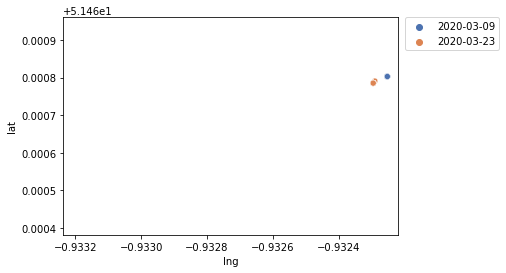

00:08:22:e0:ba:fb
designated_space
ClientMacAddr       00:08:22:e0:ba:fb
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
max_space                    entrance
Name: 1, dtype: object


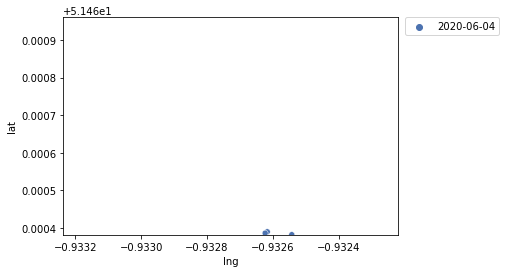

00:0b:82:d0:ff:35
designated_space
ClientMacAddr       00:0b:82:d0:ff:35
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                        0.625
it_office                         0.0
not_in_any                      0.375
max_space                    entrance
Name: 2, dtype: object


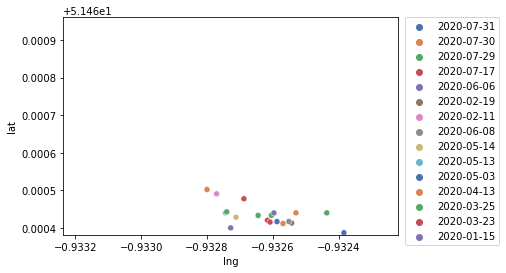

00:10:20:ce:df:1d
designated_space
ClientMacAddr       00:10:20:ce:df:1d
canteen                           1.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
max_space                     canteen
Name: 3, dtype: object


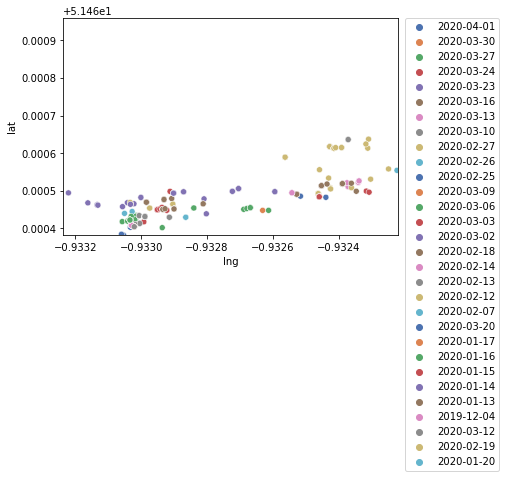

00:10:40:b9:bb:0b
designated_space
ClientMacAddr       00:10:40:b9:bb:0b
canteen                           1.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        0.0
max_space                     canteen
Name: 4, dtype: object


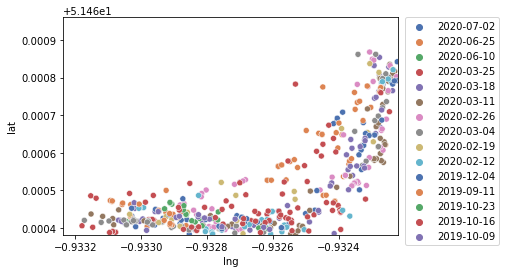

00:10:40:b9:bf:aa
designated_space
ClientMacAddr       00:10:40:b9:bf:aa
canteen                      0.333333
conference                        0.0
engineering_room             0.151515
entrance                     0.212121
it_office                    0.090909
not_in_any                   0.212121
max_space                     canteen
Name: 5, dtype: object


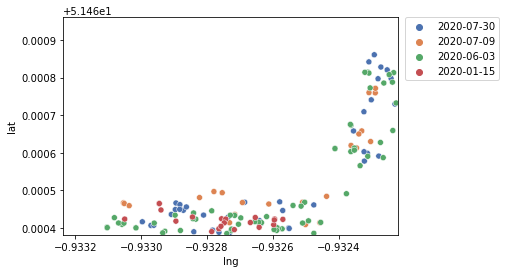

00:23:a7:e5:84:78
designated_space
ClientMacAddr       00:23:a7:e5:84:78
canteen                      0.559701
conference                        0.0
engineering_room                  0.0
entrance                     0.440299
it_office                         0.0
not_in_any                        0.0
max_space                     canteen
Name: 6, dtype: object


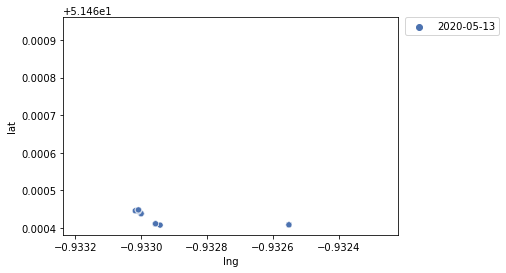

00:80:92:df:7b:97
designated_space
ClientMacAddr       00:80:92:df:7b:97
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          0.0
it_office                         0.0
not_in_any                        1.0
max_space                  not_in_any
Name: 7, dtype: object


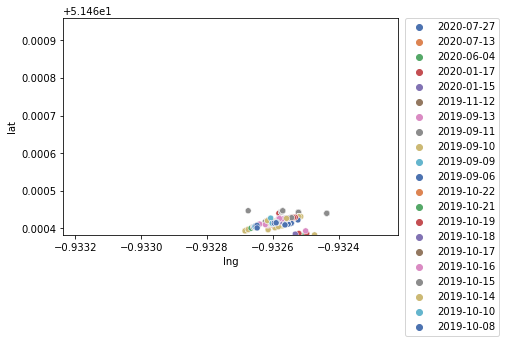

00:c2:c6:f9:2f:9f
designated_space
ClientMacAddr       00:c2:c6:f9:2f:9f
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
max_space                    entrance
Name: 8, dtype: object


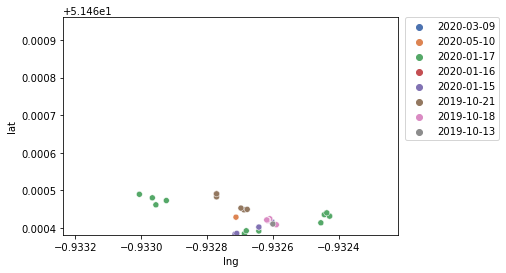

00:e1:8c:d6:86:7f
designated_space
ClientMacAddr       00:e1:8c:d6:86:7f
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
max_space                    entrance
Name: 9, dtype: object


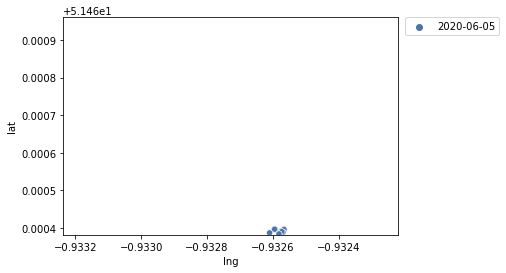

00:e1:93:2c:cc:9f
designated_space
ClientMacAddr       00:e1:93:2c:cc:9f
canteen                           0.0
conference                        0.0
engineering_room             0.980384
entrance                     0.002504
it_office                    0.000417
not_in_any                   0.016694
max_space            engineering_room
Name: 10, dtype: object


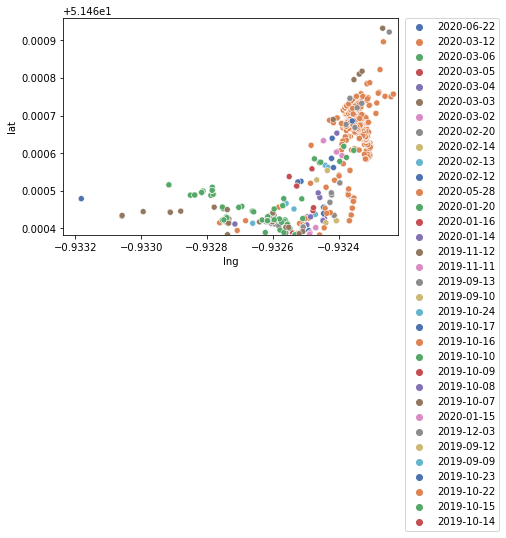

04:72:95:ba:6d:af
designated_space
ClientMacAddr       04:72:95:ba:6d:af
canteen                      0.105263
conference                        0.0
engineering_room             0.003008
entrance                     0.873684
it_office                         0.0
not_in_any                   0.018045
max_space                    entrance
Name: 11, dtype: object


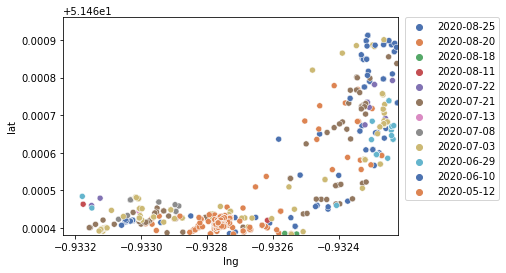

04:d6:aa:88:5d:e1
designated_space
ClientMacAddr       04:d6:aa:88:5d:e1
canteen                          0.05
conference                        0.0
engineering_room                  0.0
entrance                     0.916667
it_office                    0.016667
not_in_any                   0.016667
max_space                    entrance
Name: 12, dtype: object


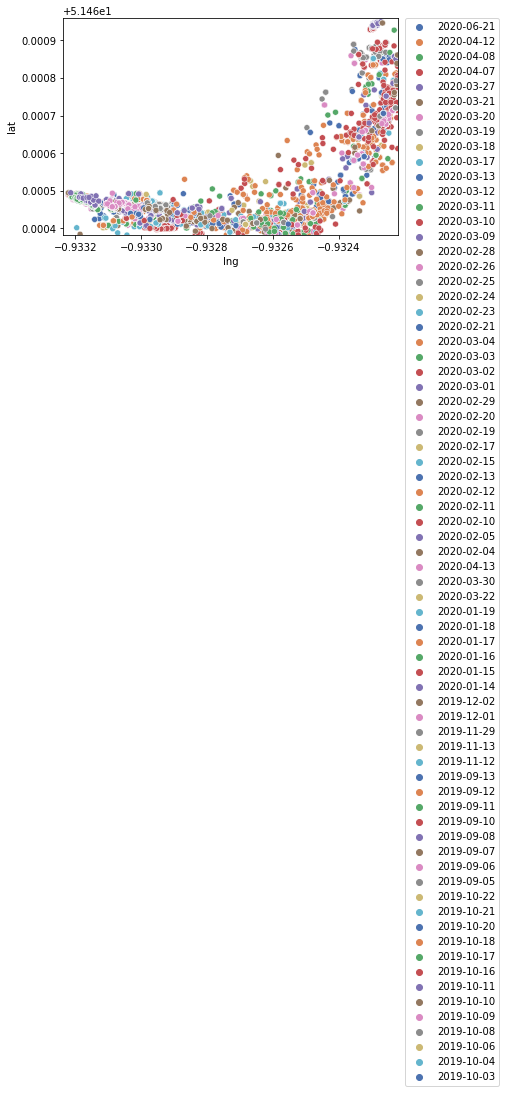

04:ea:56:92:f9:9b
designated_space
ClientMacAddr       04:ea:56:92:f9:9b
canteen                      0.002488
conference                        0.0
engineering_room                  0.0
entrance                     0.997512
it_office                         0.0
not_in_any                        0.0
max_space                    entrance
Name: 13, dtype: object


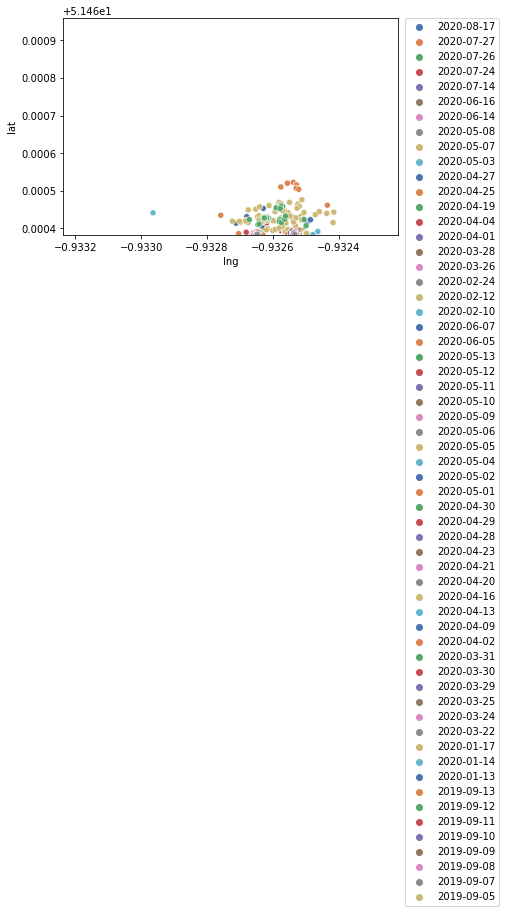

08:78:08:94:66:a4
designated_space
ClientMacAddr       08:78:08:94:66:a4
canteen                           0.5
conference                        0.0
engineering_room                  0.0
entrance                          0.5
it_office                         0.0
not_in_any                        0.0
max_space                     canteen
Name: 14, dtype: object


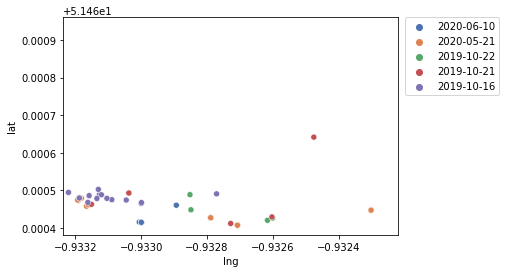

08:cc:27:32:56:dc
designated_space
ClientMacAddr       08:cc:27:32:56:dc
canteen                      0.928571
conference                        0.0
engineering_room                  0.0
entrance                     0.071429
it_office                         0.0
not_in_any                        0.0
max_space                     canteen
Name: 15, dtype: object


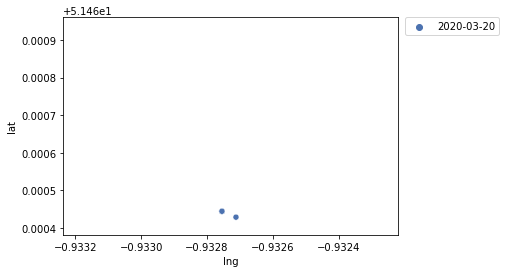

08:cc:27:44:95:7c
designated_space
ClientMacAddr       08:cc:27:44:95:7c
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
max_space                    entrance
Name: 16, dtype: object


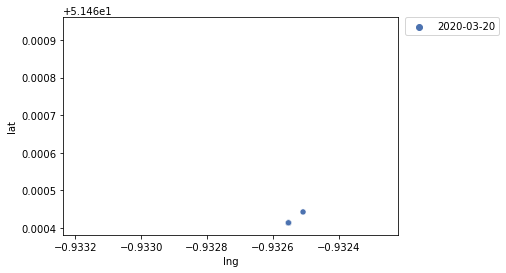

08:cc:27:c4:ae:e8
designated_space
ClientMacAddr       08:cc:27:c4:ae:e8
canteen                           0.0
conference                        0.0
engineering_room                  0.0
entrance                          1.0
it_office                         0.0
not_in_any                        0.0
max_space                    entrance
Name: 17, dtype: object


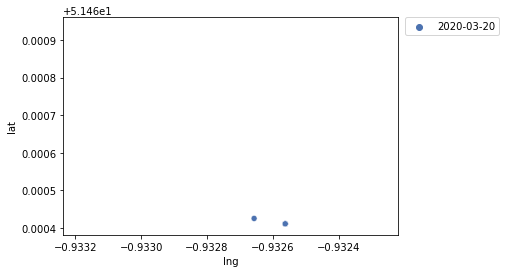

08:e6:89:17:48:61
designated_space
ClientMacAddr       08:e6:89:17:48:61
canteen                      0.002865
conference                        0.0
engineering_room             0.420845
entrance                     0.008417
it_office                    0.249463
not_in_any                    0.31841
max_space            engineering_room
Name: 18, dtype: object


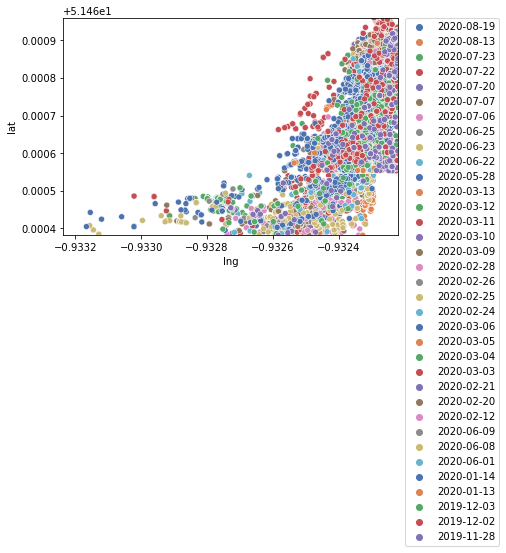

0c:2f:b0:83:ee:82
designated_space
ClientMacAddr       0c:2f:b0:83:ee:82
canteen                      0.344086
conference                   0.005376
engineering_room             0.086022
entrance                     0.436559
it_office                    0.012903
not_in_any                   0.115054
max_space                    entrance
Name: 19, dtype: object


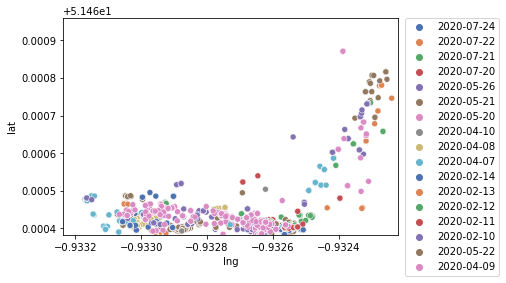

In [51]:
## plot the data with associated space
ind = 0
for i in df_mobile_space["ClientMacAddr"].unique()[:20]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space.loc[ind,:])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

# Plot machinary

In [52]:
Fix_device.head()

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
4452  80:58:f8:cc:10:67  51.460600  51.460574 -0.932327 -0.932364   
7520  d0:77:14:7f:b9:2c  51.460494  51.460474 -0.933169 -0.933209   
3800  80:58:f8:70:0f:66  51.460492  51.460448 -0.933030 -0.933038   
7446  d0:77:14:74:85:9d  51.460494  51.460478 -0.933179 -0.933221   
8218  d0:77:14:ff:47:71  51.460457  51.460433 -0.932919 -0.932956   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
4452         4.997148          1            13      1.0      0.0   
7520         4.988431          1            13      1.0      0.0   
3800         4.977924          1            13      1.0      0.0   
7446         4.975688          1            13      1.0      0.0   
8218         4.960126          1            14      1.0      0.0   

     Mobile_or_fixed  
4452    Fixed Device  
7520    Fixed Device  
3800    Fixed Device  
7446    Fixed Device  
8218    Fixed Device

In [53]:
Fix_device.shape

(4459, 11)

In [54]:
machinery_df = Fix_device.loc[Fix_device["total_day"] > 5, :]
print(machinery_df.shape)
machinery_df

(22, 11)


ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
2519  60:57:18:d7:19:c3  51.460418  51.460403 -0.932993 -0.933030   
8694  f0:98:9d:67:ba:9f  51.460417  51.460404 -0.933012 -0.933035   
8361  dc:53:60:c0:18:5e  51.460415  51.460404 -0.933005 -0.933029   
8360  dc:53:60:c0:18:3b  51.460414  51.460404 -0.933000 -0.933022   
9530  fc:4d:d4:55:31:b4  51.460413  51.460404 -0.933004 -0.933021   
5681  9c:4e:36:92:ec:e4  51.460413  51.460404 -0.933004 -0.933021   
5721  9c:b6:d0:e1:9b:4b  51.460410  51.460404 -0.933018 -0.933033   
6250  b4:6b:fc:06:18:69  51.460409  51.460404 -0.933012 -0.933028   
2729  6c:c7:ec:66:ab:a5  51.460410  51.460404 -0.933013 -0.933028   
5680  9c:4e:36:86:82:ec  51.460413  51.460404 -0.933013 -0.933026   
2016  4c:66:41:db:99:33  51.460410  51.460404 -0.933021 -0.933033   
6451  bc:e1:43:2a:fe:d9  51.460411  51.460404 -0.933014 -0.933026   
872   1c:5c:f2:ac:52:3f  51.460409  51.460404 -0.933011 -0.933021   
2432  5c:e0:c5:ad:af:f2  51.460408  51.460404 -0.933020 -0.933030   
2732  6c:c7:ec:6c:ec:9a  51.460409  51.460404 -0.933012 -0.933021   
411   04:72:95:42:af:df  51.460409  51.460404 -0.933016 -0.933024   
6655  c4:e9:84:09:a4:6f  51.460408  51.460404 -0.933013 -0.933021   
5402  94:0c:98:21:6b:6d  51.460407  51.460404 -0.933015 -0.933021   
6093  a4:f1:e8:1c:a9:04  51.460406  51.460404 -0.933017 -0.933021   
5723  9c:b6:d0:e2:75:ed  51.460406  51.460404 -0.933017 -0.933021   
1283  30:07:4d:f3:43:15  51.460406  51.460404 -0.933018 -0.933021   
8324  d8:68:c3:a3:80:91  51.460404  51.460404 -0.933021 -0.933021   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
2519         4.430983          6           110      6.0      0.0   
8694         2.861139          7           481      7.0      0.0   
8361         2.847297         14          3816     14.0      0.0   
8360         2.700743          7          4141      7.0      0.0   
9530         2.117052         13          2619     13.0      0.0   
5681         2.117052         13           329     12.0      1.0   
5721         1.840332         10           195     10.0      0.0   
6250         1.798668          9           126      9.0      0.0   
2729         1.726850          7           300      7.0      0.0   
5680         1.694775          9           130      9.0      0.0   
2016         1.506728          8           116      8.0      0.0   
6451         1.463394          6           137      6.0      0.0   
872          1.231993          9           350      9.0      0.0   
2432         1.175827         10           183     10.0      0.0   
2732         1.100457          7           112      7.0      0.0   
411          1.007770         12           253     12.0      0.0   
6655         0.981769          6          1014      6.0      0.0   
5402         0.778934          8           189      8.0      0.0   
6093         0.546946         10           133     10.0      0.0   
5723         0.546946          9           131      9.0      0.0   
1283         0.430663         10           206     10.0      0.0   
8324         0.000000          8           115      8.0      0.0   

     Mobile_or_fixed  
2519    Fixed Device  
8694    Fixed Device  
8361    Fixed Device  
8360    Fixed Device  
9530    Fixed Device  
5681    Fixed Device  
5721    Fixed Device  
6250    Fixed Device  
2729    Fixed Device  
5680    Fixed Device  
2016    Fixed Device  
6451    Fixed Device  
872     Fixed Device  
2432    Fixed Device  
2732    Fixed Device  
411     Fixed Device  
6655    Fixed Device  
5402    Fixed Device  
6093    Fixed Device  
5723    Fixed Device  
1283    Fixed Device  
8324    Fixed Device

60:57:18:d7:19:c3


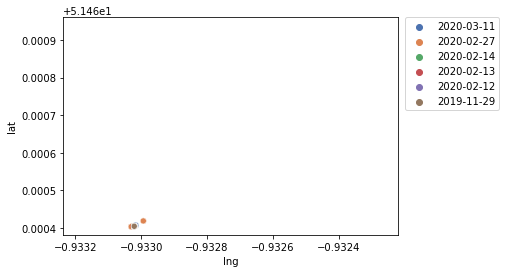

f0:98:9d:67:ba:9f


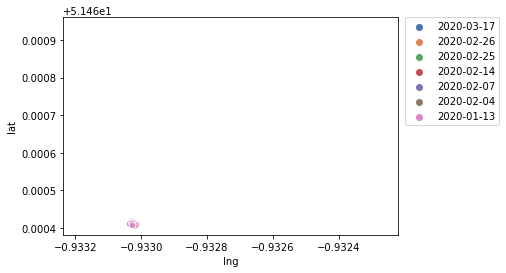

dc:53:60:c0:18:5e


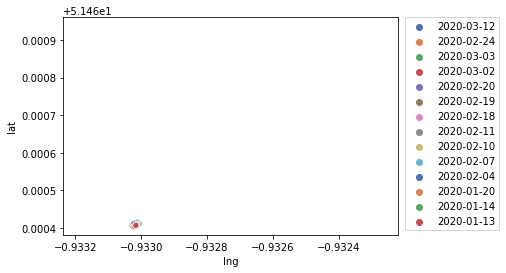

dc:53:60:c0:18:3b


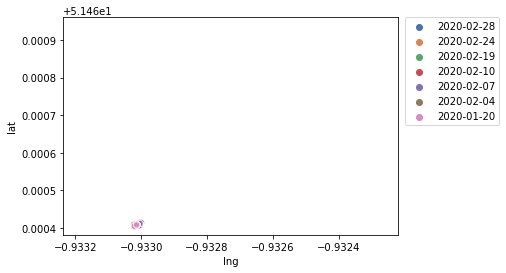

fc:4d:d4:55:31:b4


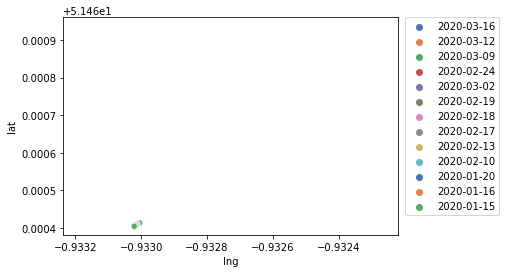

9c:4e:36:92:ec:e4


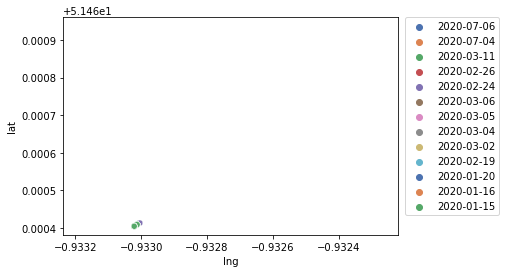

9c:b6:d0:e1:9b:4b


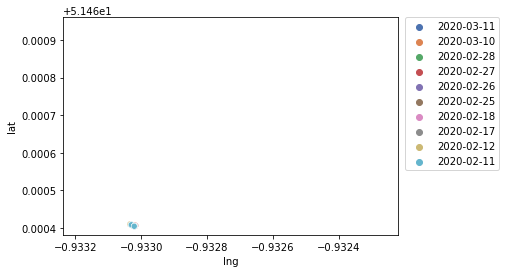

b4:6b:fc:06:18:69


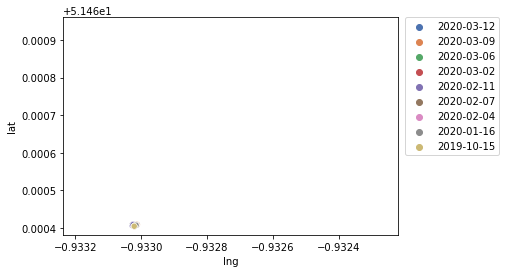

6c:c7:ec:66:ab:a5


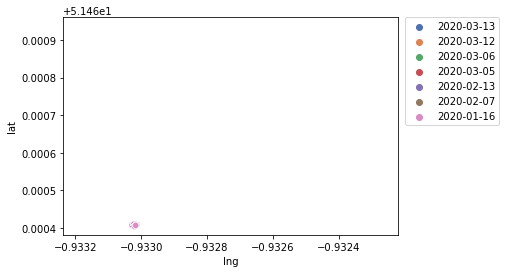

9c:4e:36:86:82:ec


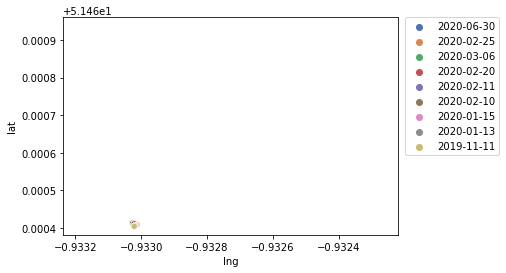

4c:66:41:db:99:33


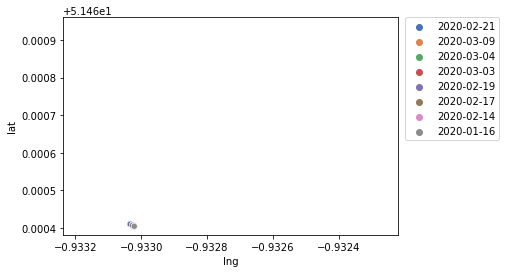

bc:e1:43:2a:fe:d9


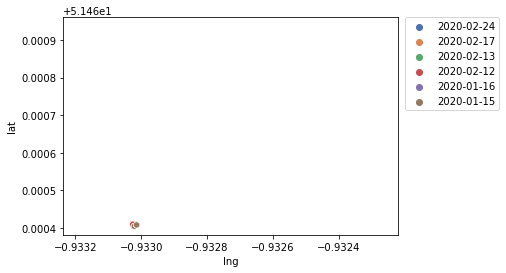

1c:5c:f2:ac:52:3f


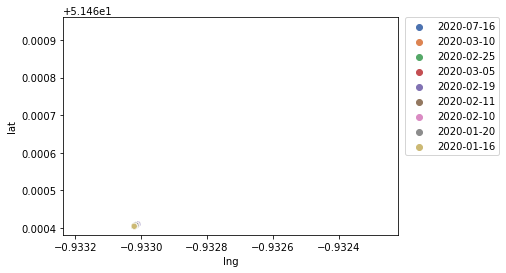

5c:e0:c5:ad:af:f2


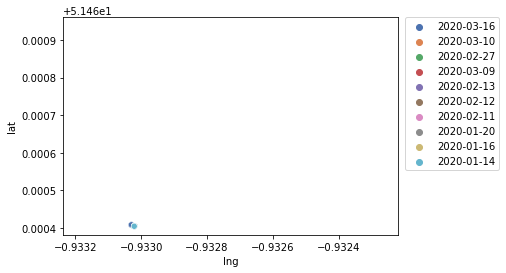

6c:c7:ec:6c:ec:9a


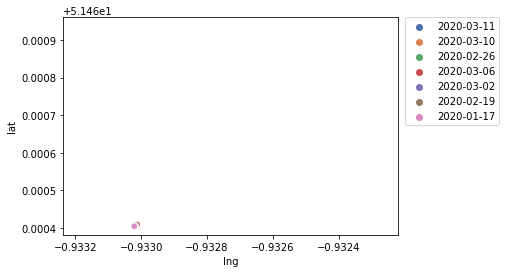

04:72:95:42:af:df


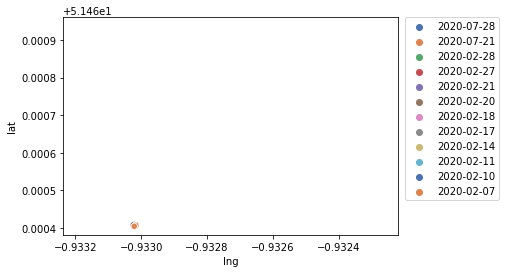

c4:e9:84:09:a4:6f


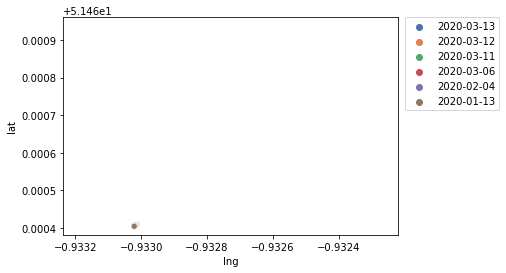

94:0c:98:21:6b:6d


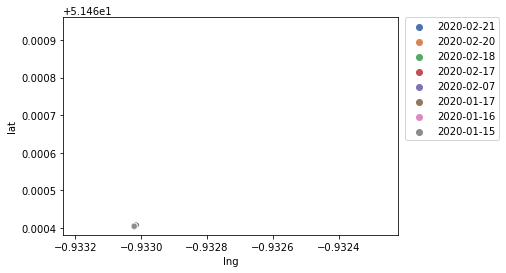

a4:f1:e8:1c:a9:04


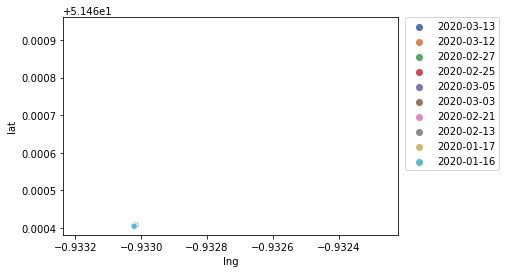

9c:b6:d0:e2:75:ed


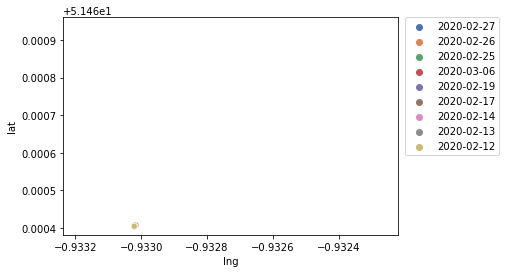

30:07:4d:f3:43:15


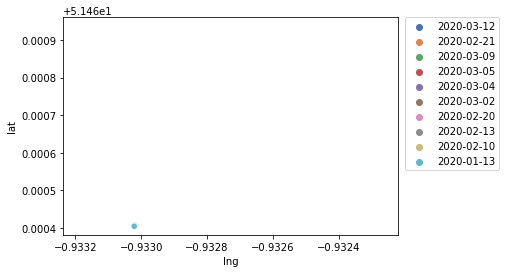

d8:68:c3:a3:80:91


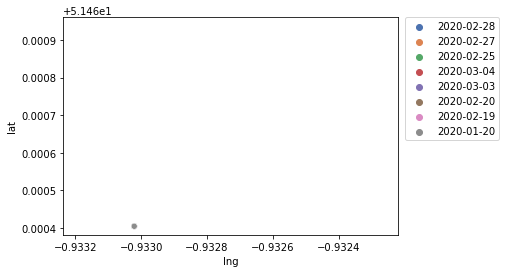

In [55]:
for i in machinery_df["ClientMacAddr"].unique():
    print(i)
    # plot machinary colored by date
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

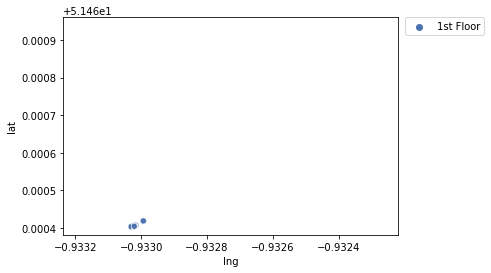

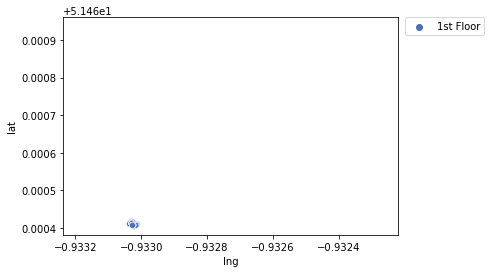

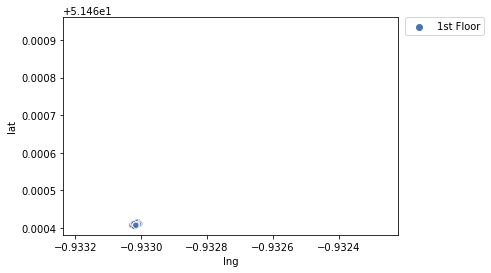

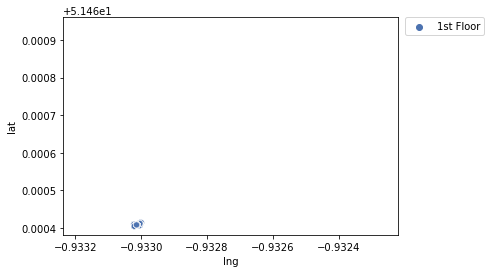

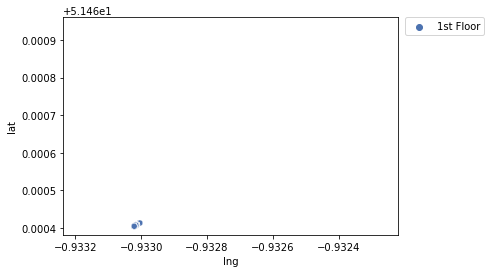

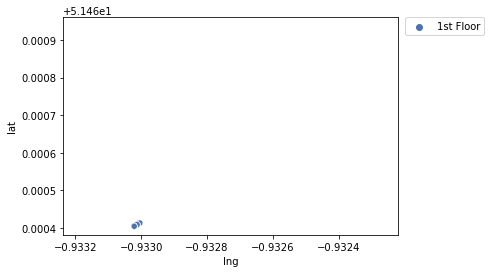

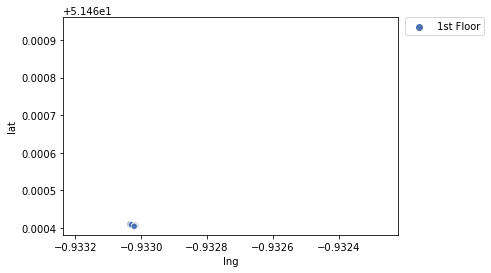

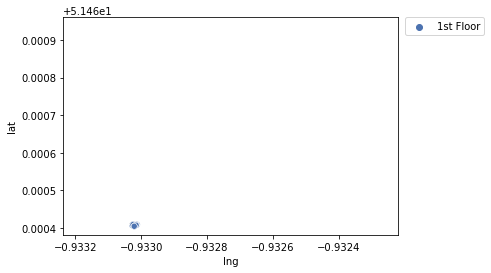

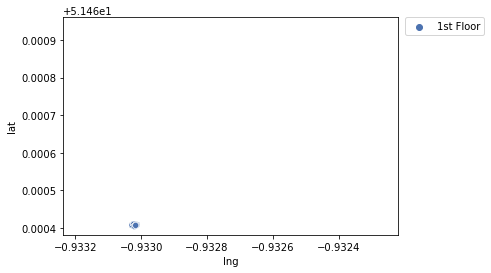

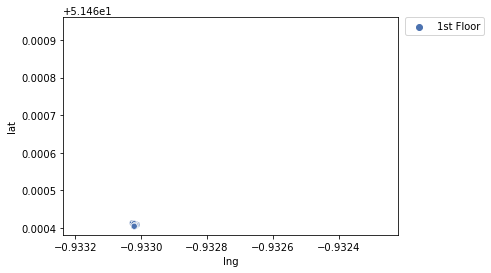

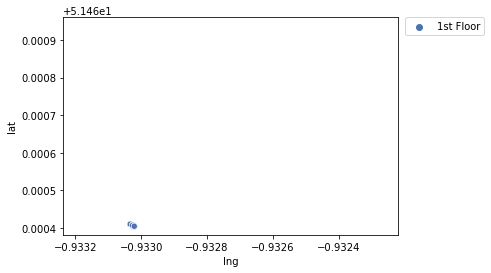

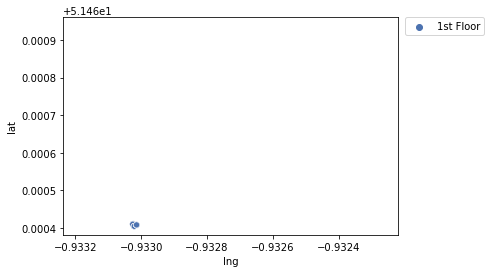

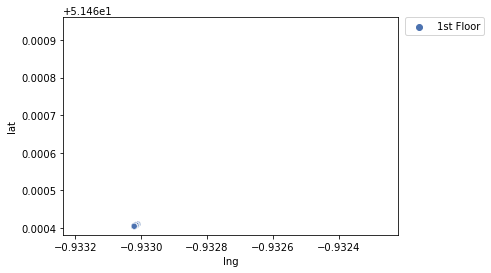

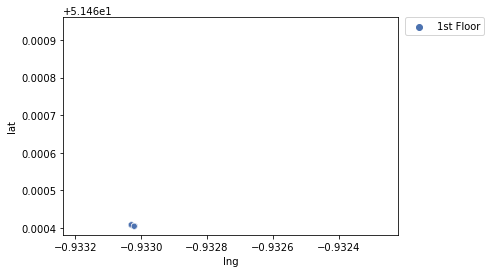

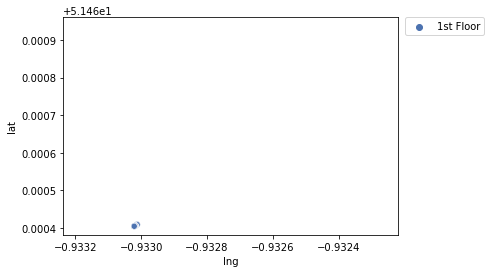

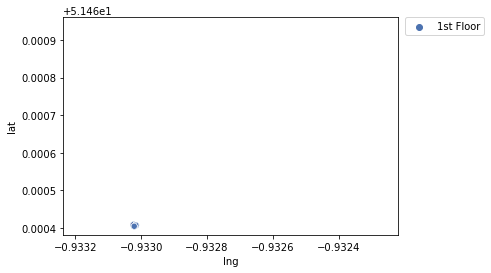

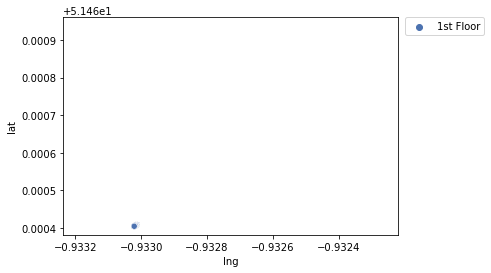

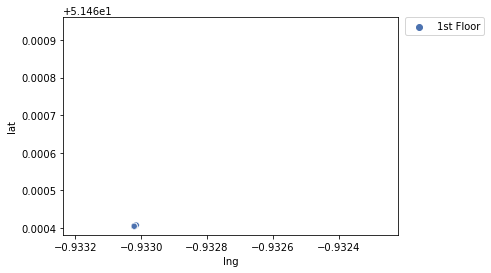

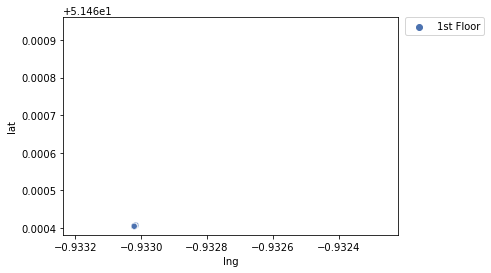

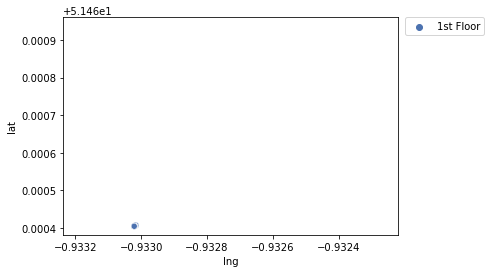

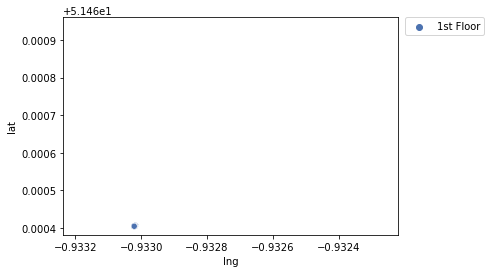

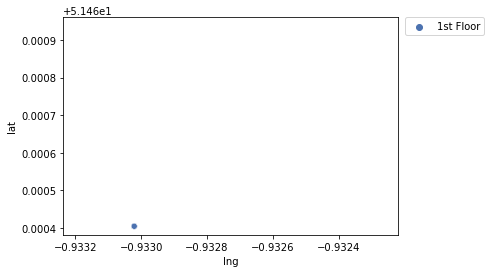

In [56]:
# plot machinary colored by level
for i in machinery_df["ClientMacAddr"].unique():
    sns.scatterplot(x="lng", y="lat", data=df[df['ClientMacAddr'] == i], hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

## Count number of signals that belong to designated areas (1st Floor)

In [64]:
def find_designated_space_1F(lat, lng):
    designated_space = 'Not in any'
    # Canteen
    bottom_left_canteen = (51.46079754688419, -0.932543300159931)
    top_right_canteen   = (51.46098040420442, -0.9322317891150113)
    
    # Lab
    bottom_left_lab = (51.460511289004344, -0.9325966645999756)
    top_right_lab = (51.46076277798453, -0.9322830982136779)
    
    # Entrance
    bottom_left_entrance = (51.46030604220702, -0.932772184478665)
    top_right_entrance = (51.46038783329849, -0.9325170620291541)
    
    # Assembly Line
    bottom_left_assemblyline = (51.46037535823833, -0.933292264577848)
    top_right_assemblyline = (51.46053231597175, -0.9329178977311808)
    
    # Control room
    bottom_left_control_rooms = (51.46036351126477, -0.9329178977311808)
    top_right_control_rooms = (51.4605206006061, -0.9327703787013455)

    # Storage
    bottom_left_storage = (51.46036685171761, -0.932772184478665)
    top_right_storage = (51.460505605290635, -0.9326059032401409)
    
    # Admin office
    bottom_left_admin_office = (51.46035352283357, -0.9325924891387347)
    top_right_admin_office = (51.46047718898315, -0.9323189038465033)
    
    if lat >= bottom_left_canteen[0] and lat <= top_right_canteen[0] and lng >= bottom_left_canteen[1] and lng <= top_right_canteen[1]:
        designated_space = 'canteen'
    elif lat >= bottom_left_lab[0] and lat <= top_right_lab[0] and lng >= bottom_left_lab[1] and lng <= top_right_lab[1]:
        designated_space = 'lab'
    elif lat >= bottom_left_entrance[0] and lat <= top_right_entrance[0] and lng >= bottom_left_entrance[1] and lng <= top_right_entrance[1]:
        designated_space = 'entrance'
    elif lat >= bottom_left_assemblyline[0] and lat <= top_right_assemblyline[0] and lng >= bottom_left_assemblyline[1] and lng <= top_right_assemblyline[1]:
        designated_space = 'assembly_line'
    elif lat >= bottom_left_control_rooms[0] and lat <= top_right_control_rooms[0] and lng >= bottom_left_control_rooms[1] and lng <= top_right_control_rooms[1]:
        designated_space = 'control_rooms'
    elif lat >= bottom_left_storage[0] and lat <= top_right_storage[0] and lng >= bottom_left_storage[1] and lng <= top_right_storage[1]:
        designated_space = 'storage'
    elif lat >= bottom_left_admin_office[0] and lat <= top_right_admin_office[0] and lng >= bottom_left_admin_office[1] and lng <= top_right_admin_office[1]:
        designated_space = 'admin_office'
    else:
        designated_space = 'not_in_any'
    
    return designated_space

### Mobile Device

In [62]:
## Select only 1st floor, mobile mac id, and weekday data
df_mobile_1F = df[(df['ClientMacAddr'].isin(Mobile_device["ClientMacAddr"])) & 
               (df['Level'].isin(["1st Floor"])) &
               (df['ClientMacAddr'].isin(df_weekday["ClientMacAddr"]))]
df_mobile_1F

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
...             ...        ...                ...        ...       ...   
34290603  UK Office  1st Floor  48:45:20:37:c0:a3  51.460959 -0.932292   
34290604  UK Office  1st Floor  a4:c3:f0:a5:f0:f0  51.460951 -0.932286   
34290605  UK Office  1st Floor  5c:5f:67:8b:e1:b5  51.460795 -0.932229   
34290606  UK Office  1st Floor  c4:6e:1f:1b:4f:c0  51.460851 -0.932247   
34290607  UK Office  1st Floor  98:10:e8:3a:8a:6e  51.460689 -0.932237   

                                localtime                  normalized_time  \
0        2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1        2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2        2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3        2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4        2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   
...                                   ...                              ...   
34290603 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290604 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290605 2019-10-03 15:27:49.275000+00:00 2019-10-03 15:27:49.275000+00:00   
34290606 2019-10-03 15:27:49.271000+00:00 2019-10-03 15:27:49.271000+00:00   
34290607 2019-10-03 15:27:49.078000+00:00 2019-10-03 15:27:49.078000+00:00   

                date      time  dayOfWeek  IsWeekend  
0         2020-09-01  23:58:49          1      False  
1         2020-09-01  23:58:38          1      False  
2         2020-09-01  23:58:29          1      False  
3         2020-09-01  23:58:18          1      False  
4         2020-09-01  23:58:09          1      False  
...              ...       ...        ...        ...  
34290603  2019-10-03  15:27:49          3      False  
34290604  2019-10-03  15:27:49          3      False  
34290605  2019-10-03  15:27:49          3      False  
34290606  2019-10-03  15:27:49          3      False  
34290607  2019-10-03  15:27:49          3      False  

[31113301 rows x 11 columns]

In [65]:
df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)
df_mobile_1F['designated_space'].value_counts()

<ipython-input-65-04f144cef11e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mobile_1F['designated_space'] = df_mobile_1F.apply(lambda x: find_designated_space_1F(x['lat'], x['lng']), axis=1)


assembly_line    7543294
lab              6212160
not_in_any       6016771
control_rooms    4090361
storage          3712284
canteen          2063970
admin_office     1290768
entrance          183693
Name: designated_space, dtype: int64

In [66]:
df_mobile_1F

Site      Level      ClientMacAddr        lat       lng  \
0         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
1         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
2         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460448 -0.933048   
3         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
4         UK Office  1st Floor  9c:8c:6e:46:1c:5e  51.460445 -0.933048   
...             ...        ...                ...        ...       ...   
34290603  UK Office  1st Floor  48:45:20:37:c0:a3  51.460959 -0.932292   
34290604  UK Office  1st Floor  a4:c3:f0:a5:f0:f0  51.460951 -0.932286   
34290605  UK Office  1st Floor  5c:5f:67:8b:e1:b5  51.460795 -0.932229   
34290606  UK Office  1st Floor  c4:6e:1f:1b:4f:c0  51.460851 -0.932247   
34290607  UK Office  1st Floor  98:10:e8:3a:8a:6e  51.460689 -0.932237   

                                localtime                  normalized_time  \
0        2020-09-01 23:58:49.582000+00:00 2020-09-01 23:58:49.582000+00:00   
1        2020-09-01 23:58:38.112000+00:00 2020-09-01 23:58:38.112000+00:00   
2        2020-09-01 23:58:29.514000+00:00 2020-09-01 23:58:29.514000+00:00   
3        2020-09-01 23:58:18.046000+00:00 2020-09-01 23:58:18.046000+00:00   
4        2020-09-01 23:58:09.522000+00:00 2020-09-01 23:58:09.522000+00:00   
...                                   ...                              ...   
34290603 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290604 2019-10-03 15:27:49.278000+00:00 2019-10-03 15:27:49.278000+00:00   
34290605 2019-10-03 15:27:49.275000+00:00 2019-10-03 15:27:49.275000+00:00   
34290606 2019-10-03 15:27:49.271000+00:00 2019-10-03 15:27:49.271000+00:00   
34290607 2019-10-03 15:27:49.078000+00:00 2019-10-03 15:27:49.078000+00:00   

                date      time  dayOfWeek  IsWeekend designated_space  
0         2020-09-01  23:58:49          1      False    assembly_line  
1         2020-09-01  23:58:38          1      False    assembly_line  
2         2020-09-01  23:58:29          1      False    assembly_line  
3         2020-09-01  23:58:18          1      False    assembly_line  
4         2020-09-01  23:58:09          1      False    assembly_line  
...              ...       ...        ...        ...              ...  
34290603  2019-10-03  15:27:49          3      False          canteen  
34290604  2019-10-03  15:27:49          3      False          canteen  
34290605  2019-10-03  15:27:49          3      False       not_in_any  
34290606  2019-10-03  15:27:49          3      False          canteen  
34290607  2019-10-03  15:27:49          3      False       not_in_any  

[31113301 rows x 12 columns]

In [67]:
len(df_mobile_1F['ClientMacAddr'].unique())

4721

In [68]:
def choose_max_space_1F(row):
    space_dict = {'admin_office': row[2], 'assembly_line': row[3], 'canteen': row[4],
                  'control_rooms': row[5], 'entrance': row[6], 'lab':row[7], 
                  'not_in_any':row[8], 'storage':row[9]}
    return list(dict(sorted(space_dict.items(), key=lambda item: item[1], reverse=True)).keys())[0]

In [69]:
df_mobile_space_1F = df_mobile_1F.groupby('ClientMacAddr')['designated_space'].value_counts(normalize=True).unstack().reset_index(drop=False).fillna(0)
print(df_mobile_space_1F.columns)
df_mobile_space_1F["max_space"] = [choose_max_space_1F(row) for row in df_mobile_space_1F.itertuples()]
df_mobile_space_1F.tail()


Index(['ClientMacAddr', 'admin_office', 'assembly_line', 'canteen',
       'control_rooms', 'entrance', 'lab', 'not_in_any', 'storage'],
      dtype='object', name='designated_space')


designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
4716              fc:a4:79:ad:0e:71      0.000000       0.000000  0.000000   
4717              fc:a6:67:be:c0:a5      0.047945       0.000000  0.075342   
4718              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   
4719              fc:f8:ae:5a:6f:ea      0.193146       0.000000  0.000000   
4720              fc:fc:48:36:16:6b      0.000000       0.000000  0.245614   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
4716                   0.000000  0.000000  0.714286    0.285714  0.000000   
4717                   0.002283  0.000000  0.815068    0.059361  0.000000   
4718                   0.000000  0.174603  0.000000    0.000000  0.406349   
4719                   0.000000  0.000000  0.803738    0.003115  0.000000   
4720                   0.000000  0.000000  0.438596    0.315789  0.000000   

designated_space      max_space  
4716                        lab  
4717                        lab  
4718              assembly_line  
4719                        lab  
4720                        lab

In [70]:
df_mobile_space_1F['max_space'].value_counts()

assembly_line    1227
lab               893
not_in_any        640
storage           577
control_rooms     549
admin_office      414
canteen           401
entrance           20
Name: max_space, dtype: int64

00:08:22:20:bc:fb
designated_space
ClientMacAddr    00:08:22:20:bc:fb
admin_office              0.666667
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                  0.166667
lab                            0.0
not_in_any                     0.0
storage                   0.166667
max_space             admin_office
Name: 0, dtype: object


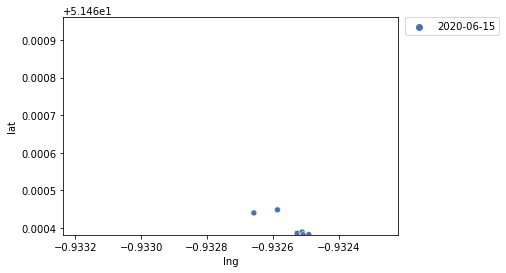

00:08:22:24:b7:fb
designated_space
ClientMacAddr    00:08:22:24:b7:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.909091
not_in_any                0.090909
storage                        0.0
max_space                      lab
Name: 1, dtype: object


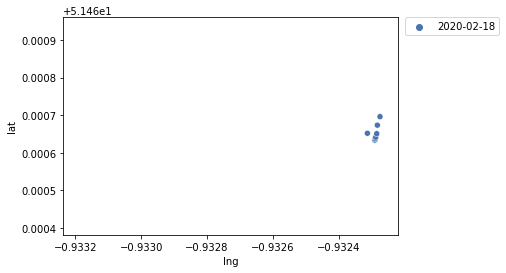

00:08:22:26:bb:fb
designated_space
ClientMacAddr    00:08:22:26:bb:fb
admin_office                   0.5
assembly_line               0.0625
canteen                        0.0
control_rooms                  0.0
entrance                    0.0625
lab                         0.1875
not_in_any                  0.0625
storage                      0.125
max_space             admin_office
Name: 2, dtype: object


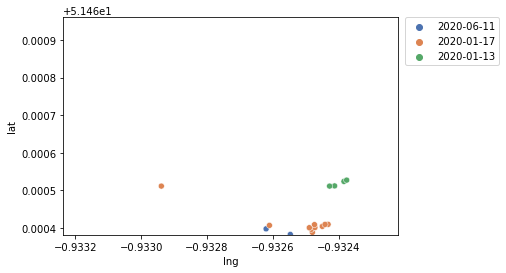

00:08:22:38:c2:fb
designated_space
ClientMacAddr    00:08:22:38:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.351351
not_in_any                0.648649
storage                        0.0
max_space               not_in_any
Name: 3, dtype: object


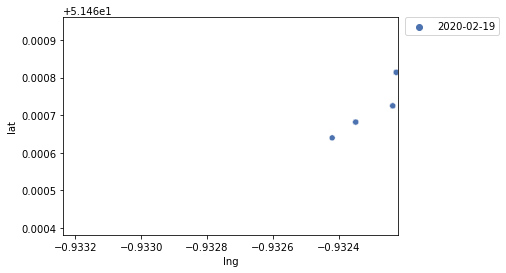

00:08:22:4c:c2:fb
designated_space
ClientMacAddr    00:08:22:4c:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.846154
not_in_any                     0.0
storage                   0.153846
max_space                      lab
Name: 4, dtype: object


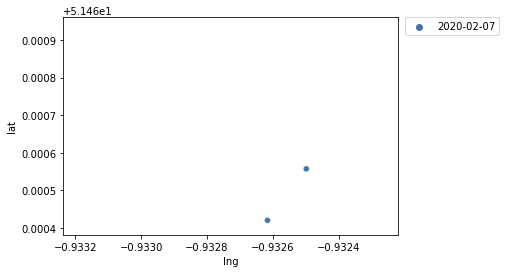

00:08:22:4c:f9:cd
designated_space
ClientMacAddr    00:08:22:4c:f9:cd
admin_office                   0.0
assembly_line                  0.0
canteen                        1.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                  canteen
Name: 5, dtype: object


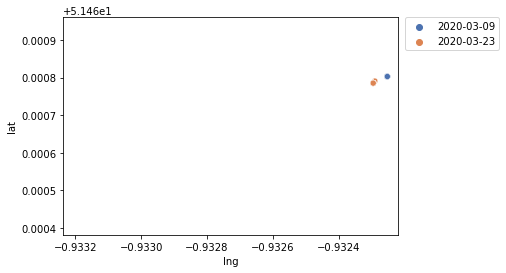

00:08:22:c0:c1:fb
designated_space
ClientMacAddr    00:08:22:c0:c1:fb
admin_office                   0.0
assembly_line                  0.0
canteen                   0.916667
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.083333
storage                        0.0
max_space                  canteen
Name: 6, dtype: object


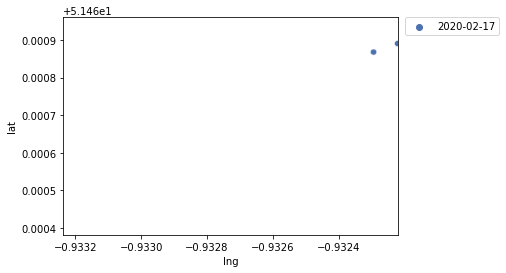

00:08:22:d8:c2:fb
designated_space
ClientMacAddr    00:08:22:d8:c2:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        1.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                  canteen
Name: 7, dtype: object


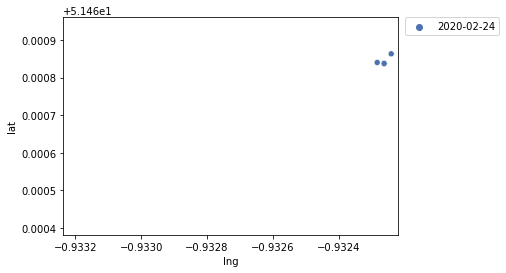

00:08:22:e0:ba:fb
designated_space
ClientMacAddr    00:08:22:e0:ba:fb
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       1.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space                 entrance
Name: 8, dtype: object


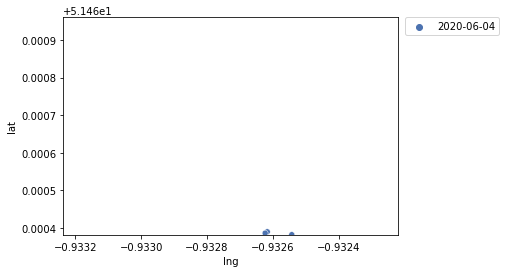

00:0a:f5:40:18:c0
designated_space
ClientMacAddr    00:0a:f5:40:18:c0
admin_office              0.023973
assembly_line             0.520548
canteen                        0.0
control_rooms             0.089041
entrance                  0.130137
lab                            0.0
not_in_any                     0.0
storage                   0.236301
max_space            assembly_line
Name: 9, dtype: object


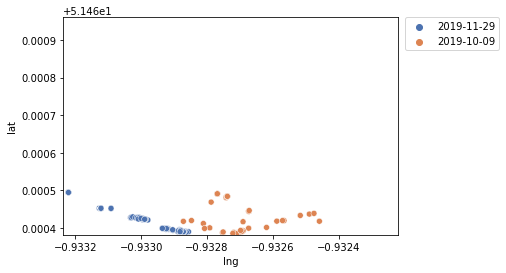

00:0b:82:d0:ff:35
designated_space
ClientMacAddr    00:0b:82:d0:ff:35
admin_office              0.363636
assembly_line                  0.0
canteen                        0.0
control_rooms             0.181818
entrance                       0.0
lab                            0.0
not_in_any                0.181818
storage                   0.272727
max_space             admin_office
Name: 10, dtype: object


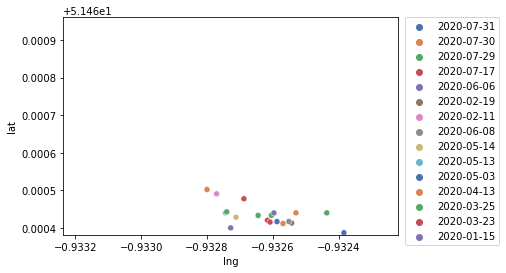

00:0c:e7:02:67:0d
designated_space
ClientMacAddr    00:0c:e7:02:67:0d
admin_office              0.923077
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.076923
storage                        0.0
max_space             admin_office
Name: 11, dtype: object


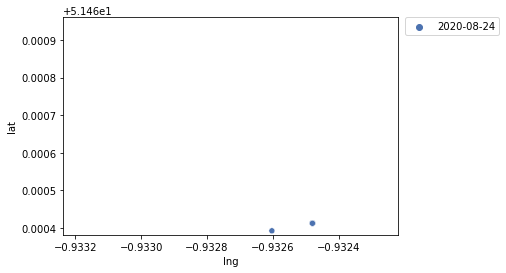

00:0c:e7:02:8b:64
designated_space
ClientMacAddr    00:0c:e7:02:8b:64
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     1.0
storage                        0.0
max_space               not_in_any
Name: 12, dtype: object


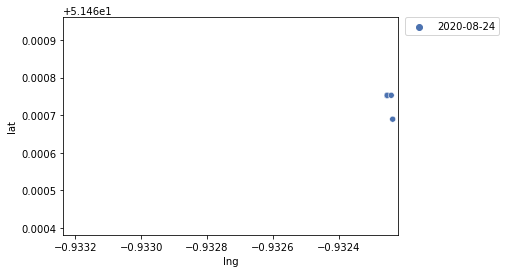

00:0c:e7:04:90:95
designated_space
ClientMacAddr    00:0c:e7:04:90:95
admin_office              0.928571
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.071429
storage                        0.0
max_space             admin_office
Name: 13, dtype: object


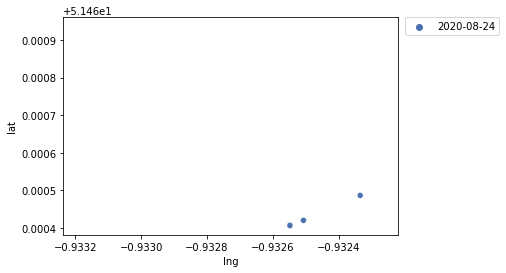

00:0c:e7:09:cd:29
designated_space
ClientMacAddr    00:0c:e7:09:cd:29
admin_office                   0.0
assembly_line                  1.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     0.0
storage                        0.0
max_space            assembly_line
Name: 14, dtype: object


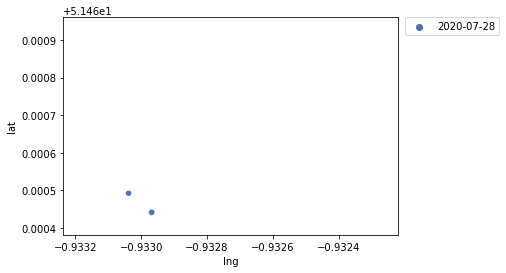

00:0c:e7:0e:01:ff
designated_space
ClientMacAddr    00:0c:e7:0e:01:ff
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            1.0
not_in_any                     0.0
storage                        0.0
max_space                      lab
Name: 15, dtype: object


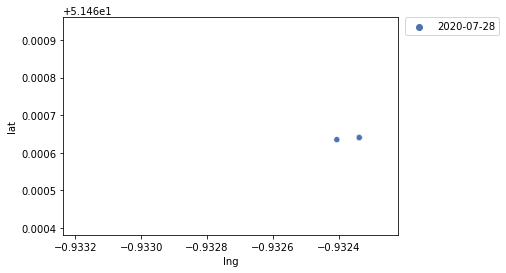

00:0c:e7:0f:71:ac
designated_space
ClientMacAddr    00:0c:e7:0f:71:ac
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                       0.928571
not_in_any                0.071429
storage                        0.0
max_space                      lab
Name: 16, dtype: object


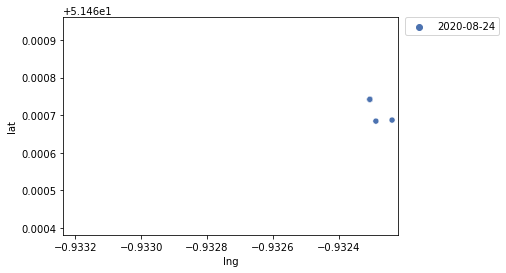

00:0c:e7:12:8d:bb
designated_space
ClientMacAddr    00:0c:e7:12:8d:bb
admin_office              0.928571
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                0.071429
storage                        0.0
max_space             admin_office
Name: 17, dtype: object


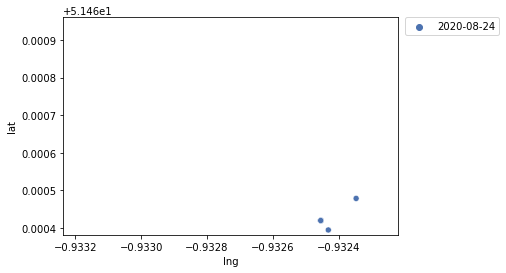

00:0c:e7:13:39:d2
designated_space
ClientMacAddr    00:0c:e7:13:39:d2
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            1.0
not_in_any                     0.0
storage                        0.0
max_space                      lab
Name: 18, dtype: object


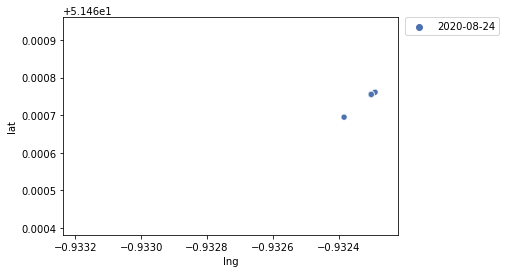

00:0c:e7:19:bb:48
designated_space
ClientMacAddr    00:0c:e7:19:bb:48
admin_office                   0.0
assembly_line                  0.0
canteen                        0.0
control_rooms                  0.0
entrance                       0.0
lab                            0.0
not_in_any                     1.0
storage                        0.0
max_space               not_in_any
Name: 19, dtype: object


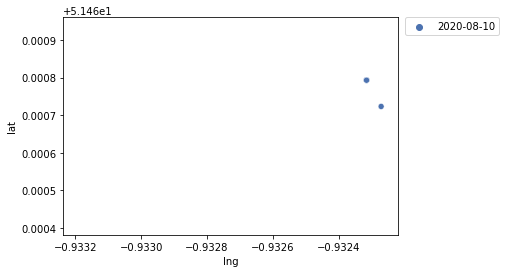

In [88]:
## plot the data with associated space
ind = 0
for i in df_mobile_space_1F["ClientMacAddr"].unique()[:20]:
    print(i)
    #print('Designated space: {}'.format(df_mobile_space.loc[ind,:]))
    print(df_mobile_space_1F.loc[ind,:])
    ind += 1
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Try to find vehicles and operator

In [98]:
vehicle_or_operator = df_mobile_space_1F[df_mobile_space_1F['max_space'] == 'assembly_line']
vehicle_or_operator

designated_space      ClientMacAddr  admin_office  assembly_line   canteen  \
9                 00:0a:f5:40:18:c0      0.023973       0.520548  0.000000   
14                00:0c:e7:09:cd:29      0.000000       1.000000  0.000000   
38                00:0c:e7:3d:4b:00      0.000000       0.857143  0.000000   
73                00:0c:e7:84:aa:b1      0.000000       1.000000  0.000000   
121               00:0c:e7:ef:e5:6b      0.000000       1.000000  0.000000   
...                             ...           ...            ...       ...   
4703              fc:3f:7c:08:cd:4d      0.000000       0.866667  0.000000   
4704              fc:45:96:12:d1:4b      0.227068       0.310526  0.140602   
4707              fc:62:b9:23:ea:05      0.000000       1.000000  0.000000   
4708              fc:62:b9:70:33:fa      0.000000       0.965116  0.000000   
4718              fc:d8:48:80:ab:de      0.003175       0.415873  0.000000   

designated_space  control_rooms  entrance       lab  not_in_any   storage  \
9                      0.089041  0.130137  0.000000    0.000000  0.236301   
14                     0.000000  0.000000  0.000000    0.000000  0.000000   
38                     0.000000  0.071429  0.000000    0.000000  0.071429   
73                     0.000000  0.000000  0.000000    0.000000  0.000000   
121                    0.000000  0.000000  0.000000    0.000000  0.000000   
...                         ...       ...       ...         ...       ...   
4703                   0.133333  0.000000  0.000000    0.000000  0.000000   
4704                   0.024060  0.034586  0.189474    0.025564  0.048120   
4707                   0.000000  0.000000  0.000000    0.000000  0.000000   
4708                   0.034884  0.000000  0.000000    0.000000  0.000000   
4718                   0.000000  0.174603  0.000000    0.000000  0.406349   

designated_space      max_space  
9                 assembly_line  
14                assembly_line  
38                assembly_line  
73                assembly_line  
121               assembly_line  
...                         ...  
4703              assembly_line  
4704              assembly_line  
4707              assembly_line  
4708              assembly_line  
4718              assembly_line  

[1227 rows x 10 columns]

                                  9
designated_space                   
ClientMacAddr     00:0a:f5:40:18:c0
admin_office               0.023973
assembly_line              0.520548
canteen                         0.0
control_rooms              0.089041
entrance                   0.130137
lab                             0.0
not_in_any                      0.0
storage                    0.236301
max_space             assembly_line


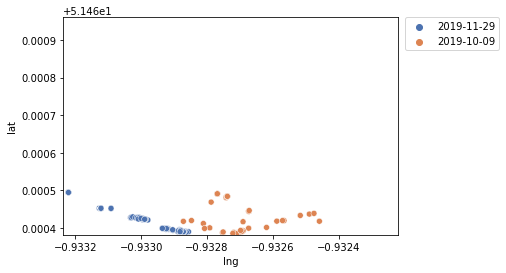

                                 14
designated_space                   
ClientMacAddr     00:0c:e7:09:cd:29
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


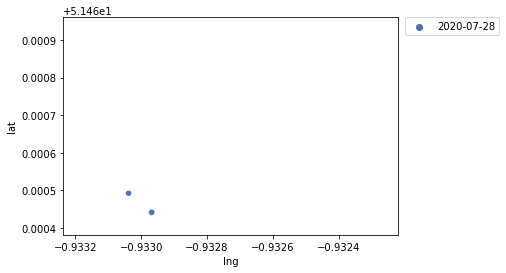

                                 38
designated_space                   
ClientMacAddr     00:0c:e7:3d:4b:00
admin_office                    0.0
assembly_line              0.857143
canteen                         0.0
control_rooms                   0.0
entrance                   0.071429
lab                             0.0
not_in_any                      0.0
storage                    0.071429
max_space             assembly_line


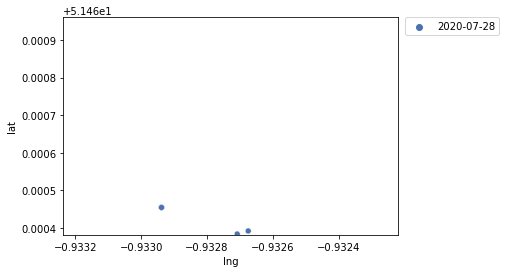

                                 73
designated_space                   
ClientMacAddr     00:0c:e7:84:aa:b1
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


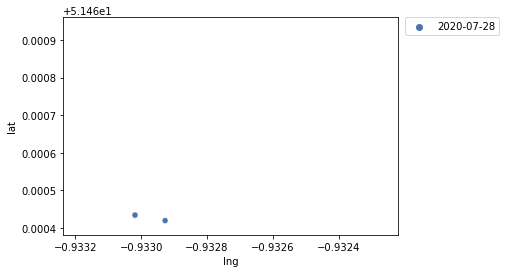

                                121
designated_space                   
ClientMacAddr     00:0c:e7:ef:e5:6b
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


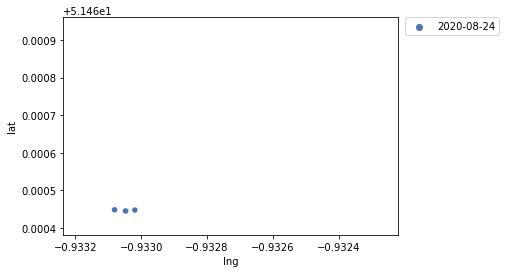

                                127
designated_space                   
ClientMacAddr     00:10:02:28:95:a7
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


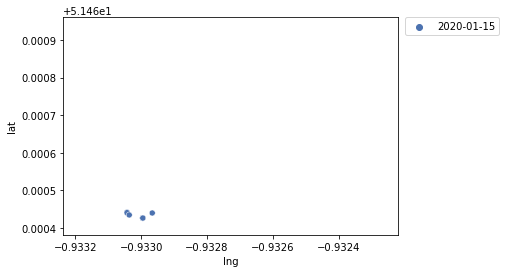

                                128
designated_space                   
ClientMacAddr     00:10:02:29:99:b5
admin_office                    0.0
assembly_line                   0.6
canteen                         0.0
control_rooms                   0.4
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


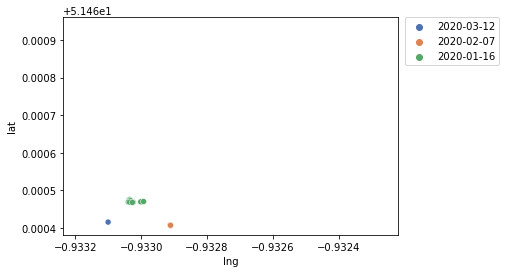

                                129
designated_space                   
ClientMacAddr     00:10:20:cd:86:91
admin_office               0.112245
assembly_line              0.744898
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                        0.040816
not_in_any                 0.091837
storage                    0.010204
max_space             assembly_line


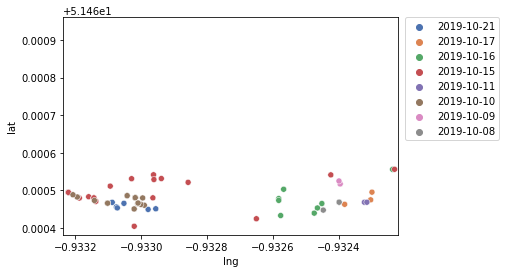

                                130
designated_space                   
ClientMacAddr     00:10:20:cd:a9:21
admin_office               0.142857
assembly_line              0.714286
canteen                         0.0
control_rooms              0.142857
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


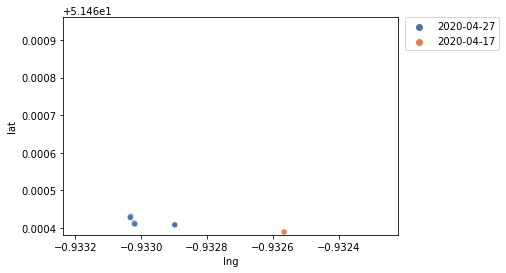

                                131
designated_space                   
ClientMacAddr     00:10:20:ce:df:1d
admin_office                    0.0
assembly_line              0.501639
canteen                         0.0
control_rooms              0.088525
entrance                        0.0
lab                        0.219672
not_in_any                 0.157377
storage                    0.032787
max_space             assembly_line


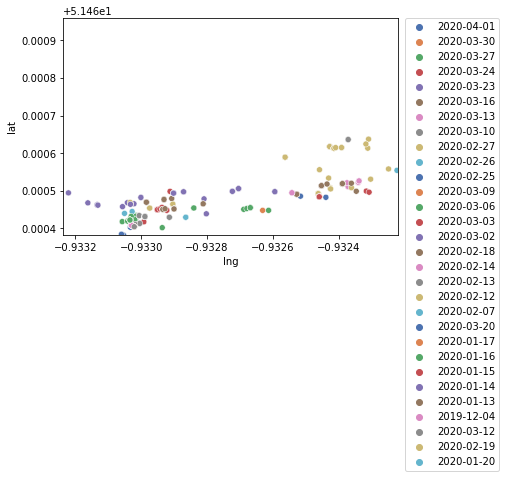

                                132
designated_space                   
ClientMacAddr     00:10:20:ce:f3:37
admin_office                    0.0
assembly_line                   0.5
canteen                         0.0
control_rooms                   0.0
entrance                        0.5
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


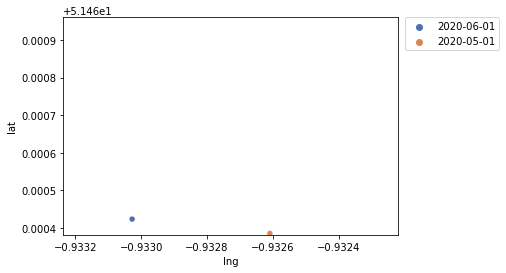

                                136
designated_space                   
ClientMacAddr     00:10:40:b9:bb:80
admin_office               0.333333
assembly_line              0.666667
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


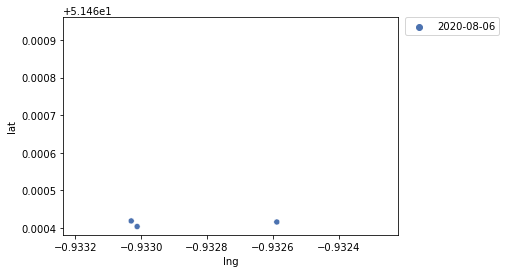

                                138
designated_space                   
ClientMacAddr     00:18:e4:d6:c8:d0
admin_office                    0.0
assembly_line              0.511111
canteen                         0.0
control_rooms              0.377778
entrance                   0.022222
lab                             0.0
not_in_any                      0.0
storage                    0.088889
max_space             assembly_line


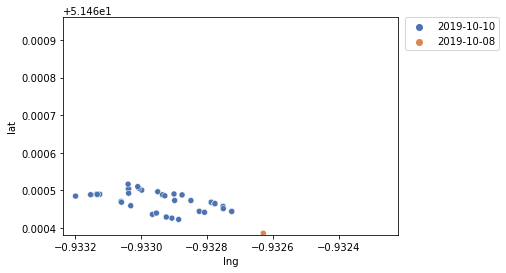

                                140
designated_space                   
ClientMacAddr     00:1e:42:19:5d:bc
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


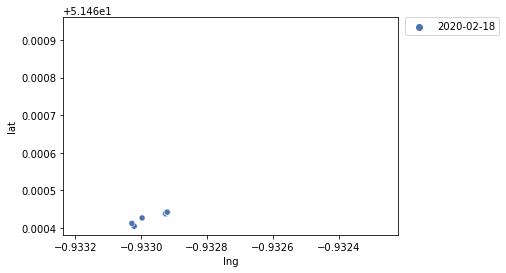

                                141
designated_space                   
ClientMacAddr     00:1e:43:97:c2:c2
admin_office                    0.0
assembly_line              0.923077
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                    0.076923
max_space             assembly_line


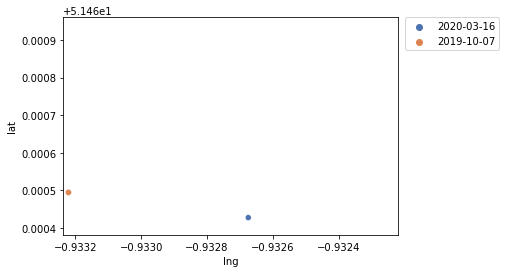

                                143
designated_space                   
ClientMacAddr     00:23:a7:d9:dc:a0
admin_office                    0.0
assembly_line              0.996354
canteen                         0.0
control_rooms              0.003646
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


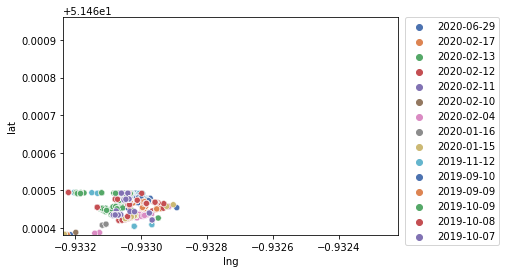

                                145
designated_space                   
ClientMacAddr     00:23:a7:e5:b3:b4
admin_office                    0.0
assembly_line               0.88841
canteen                         0.0
control_rooms              0.086613
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                    0.024978
max_space             assembly_line


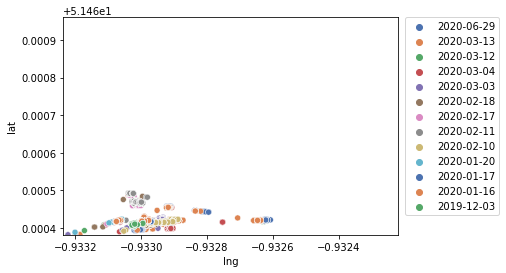

                                148
designated_space                   
ClientMacAddr     00:23:a7:e7:7e:f0
admin_office                    0.0
assembly_line              0.992688
canteen                         0.0
control_rooms              0.007312
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


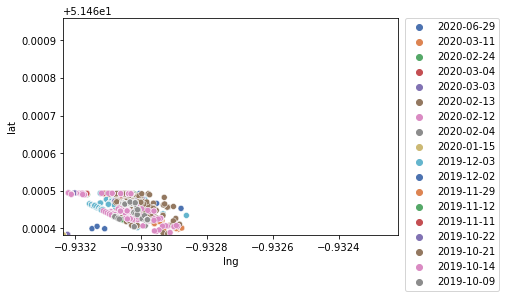

                                151
designated_space                   
ClientMacAddr     00:26:b4:f0:e6:0c
admin_office                    0.0
assembly_line                   1.0
canteen                         0.0
control_rooms                   0.0
entrance                        0.0
lab                             0.0
not_in_any                      0.0
storage                         0.0
max_space             assembly_line


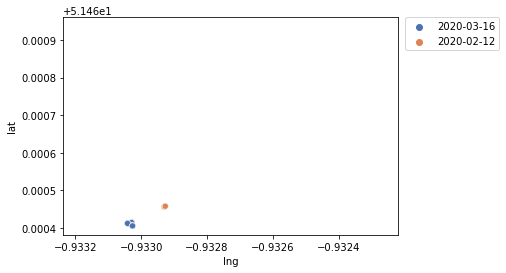

                                152
designated_space                   
ClientMacAddr     00:27:15:bc:e4:ff
admin_office                    0.0
assembly_line              0.780822
canteen                         0.0
control_rooms              0.068493
entrance                        0.0
lab                             0.0
not_in_any                  0.09589
storage                    0.054795
max_space             assembly_line


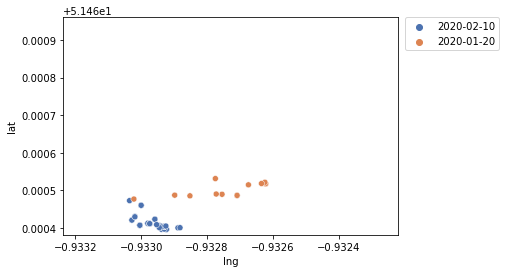

In [116]:
## plot the data with associated space
for i in vehicle_or_operator["ClientMacAddr"].unique()[:20]:
    print((vehicle_or_operator[vehicle_or_operator['ClientMacAddr'] == i]).T)
    # plot machinary colored by date
#     data=df[(df['ClientMacAddr'] == i) & (df['Level'] == '2nd Floor')]
    data=df[(df['ClientMacAddr'] == i)]
    #print(data.head())
    sns.scatterplot(x="lng", y="lat", data=data
                    , hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

### Machine

In [72]:
Fix_device.head()

ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
4452  80:58:f8:cc:10:67  51.460600  51.460574 -0.932327 -0.932364   
7520  d0:77:14:7f:b9:2c  51.460494  51.460474 -0.933169 -0.933209   
3800  80:58:f8:70:0f:66  51.460492  51.460448 -0.933030 -0.933038   
7446  d0:77:14:74:85:9d  51.460494  51.460478 -0.933179 -0.933221   
8218  d0:77:14:ff:47:71  51.460457  51.460433 -0.932919 -0.932956   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
4452         4.997148          1            13      1.0      0.0   
7520         4.988431          1            13      1.0      0.0   
3800         4.977924          1            13      1.0      0.0   
7446         4.975688          1            13      1.0      0.0   
8218         4.960126          1            14      1.0      0.0   

     Mobile_or_fixed  
4452    Fixed Device  
7520    Fixed Device  
3800    Fixed Device  
7446    Fixed Device  
8218    Fixed Device

In [78]:
Fix_device.shape

(4459, 11)

In [79]:
machinery_df = Fix_device[Fix_device["total_day"] > 5]
print(machinery_df.shape)
machinery_df

(22, 11)


ClientMacAddr    max_lat    min_lat   max_lng   min_lng  \
2519  60:57:18:d7:19:c3  51.460418  51.460403 -0.932993 -0.933030   
8694  f0:98:9d:67:ba:9f  51.460417  51.460404 -0.933012 -0.933035   
8361  dc:53:60:c0:18:5e  51.460415  51.460404 -0.933005 -0.933029   
8360  dc:53:60:c0:18:3b  51.460414  51.460404 -0.933000 -0.933022   
9530  fc:4d:d4:55:31:b4  51.460413  51.460404 -0.933004 -0.933021   
5681  9c:4e:36:92:ec:e4  51.460413  51.460404 -0.933004 -0.933021   
5721  9c:b6:d0:e1:9b:4b  51.460410  51.460404 -0.933018 -0.933033   
6250  b4:6b:fc:06:18:69  51.460409  51.460404 -0.933012 -0.933028   
2729  6c:c7:ec:66:ab:a5  51.460410  51.460404 -0.933013 -0.933028   
5680  9c:4e:36:86:82:ec  51.460413  51.460404 -0.933013 -0.933026   
2016  4c:66:41:db:99:33  51.460410  51.460404 -0.933021 -0.933033   
6451  bc:e1:43:2a:fe:d9  51.460411  51.460404 -0.933014 -0.933026   
872   1c:5c:f2:ac:52:3f  51.460409  51.460404 -0.933011 -0.933021   
2432  5c:e0:c5:ad:af:f2  51.460408  51.460404 -0.933020 -0.933030   
2732  6c:c7:ec:6c:ec:9a  51.460409  51.460404 -0.933012 -0.933021   
411   04:72:95:42:af:df  51.460409  51.460404 -0.933016 -0.933024   
6655  c4:e9:84:09:a4:6f  51.460408  51.460404 -0.933013 -0.933021   
5402  94:0c:98:21:6b:6d  51.460407  51.460404 -0.933015 -0.933021   
6093  a4:f1:e8:1c:a9:04  51.460406  51.460404 -0.933017 -0.933021   
5723  9c:b6:d0:e2:75:ed  51.460406  51.460404 -0.933017 -0.933021   
1283  30:07:4d:f3:43:15  51.460406  51.460404 -0.933018 -0.933021   
8324  d8:68:c3:a3:80:91  51.460404  51.460404 -0.933021 -0.933021   

      Distance(Meter)  total_day  total_signal  Weekday  Weekend  \
2519         4.430983          6           110      6.0      0.0   
8694         2.861139          7           481      7.0      0.0   
8361         2.847297         14          3816     14.0      0.0   
8360         2.700743          7          4141      7.0      0.0   
9530         2.117052         13          2619     13.0      0.0   
5681         2.117052         13           329     12.0      1.0   
5721         1.840332         10           195     10.0      0.0   
6250         1.798668          9           126      9.0      0.0   
2729         1.726850          7           300      7.0      0.0   
5680         1.694775          9           130      9.0      0.0   
2016         1.506728          8           116      8.0      0.0   
6451         1.463394          6           137      6.0      0.0   
872          1.231993          9           350      9.0      0.0   
2432         1.175827         10           183     10.0      0.0   
2732         1.100457          7           112      7.0      0.0   
411          1.007770         12           253     12.0      0.0   
6655         0.981769          6          1014      6.0      0.0   
5402         0.778934          8           189      8.0      0.0   
6093         0.546946         10           133     10.0      0.0   
5723         0.546946          9           131      9.0      0.0   
1283         0.430663         10           206     10.0      0.0   
8324         0.000000          8           115      8.0      0.0   

     Mobile_or_fixed  
2519    Fixed Device  
8694    Fixed Device  
8361    Fixed Device  
8360    Fixed Device  
9530    Fixed Device  
5681    Fixed Device  
5721    Fixed Device  
6250    Fixed Device  
2729    Fixed Device  
5680    Fixed Device  
2016    Fixed Device  
6451    Fixed Device  
872     Fixed Device  
2432    Fixed Device  
2732    Fixed Device  
411     Fixed Device  
6655    Fixed Device  
5402    Fixed Device  
6093    Fixed Device  
5723    Fixed Device  
1283    Fixed Device  
8324    Fixed Device

In [80]:
df_machine = df[(df['ClientMacAddr'].isin(Fix_device[Fix_device["total_day"] > 5]["ClientMacAddr"])) & 
               (df['Level'].isin(["1st Floor"]))]

df_machine['ClientMacAddr'].nunique()

22

04:72:95:42:af:df


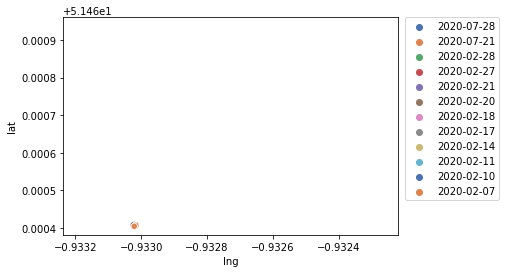

1c:5c:f2:ac:52:3f


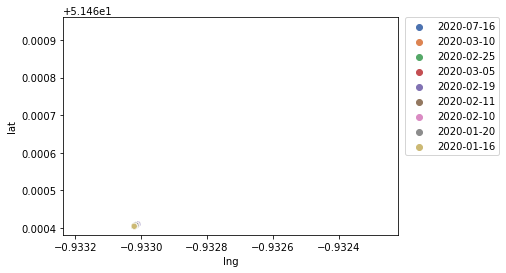

9c:4e:36:92:ec:e4


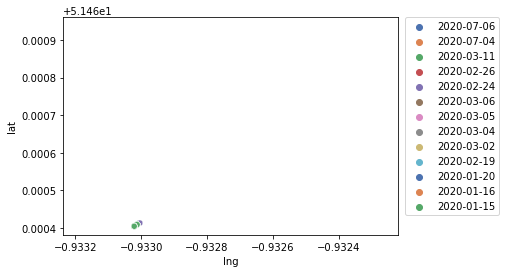

9c:4e:36:86:82:ec


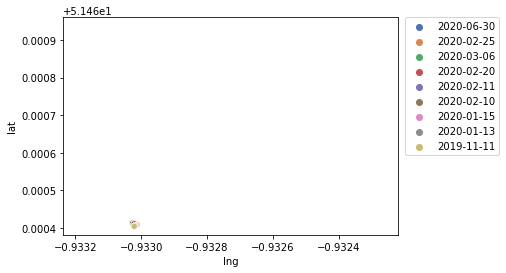

f0:98:9d:67:ba:9f


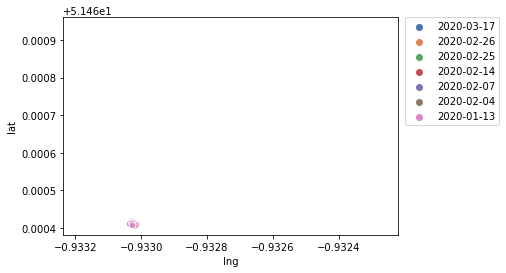

5c:e0:c5:ad:af:f2


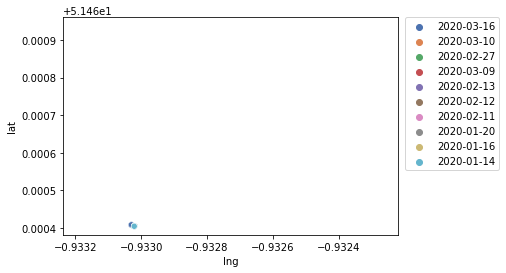

fc:4d:d4:55:31:b4


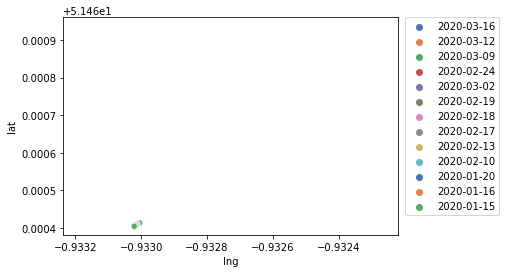

6c:c7:ec:66:ab:a5


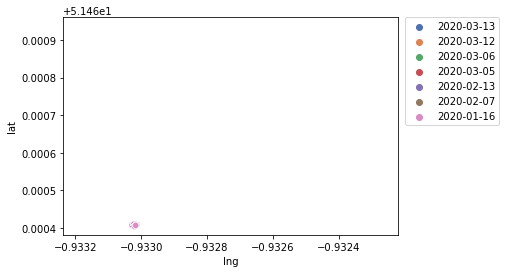

a4:f1:e8:1c:a9:04


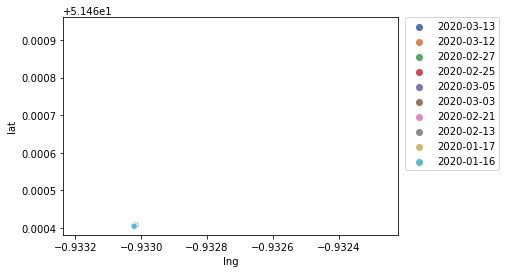

c4:e9:84:09:a4:6f


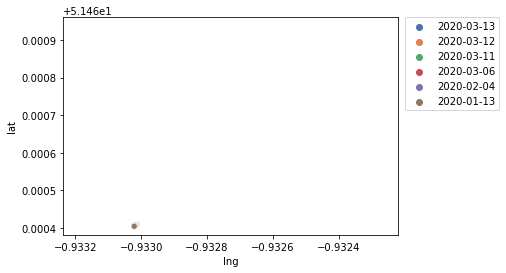

dc:53:60:c0:18:5e


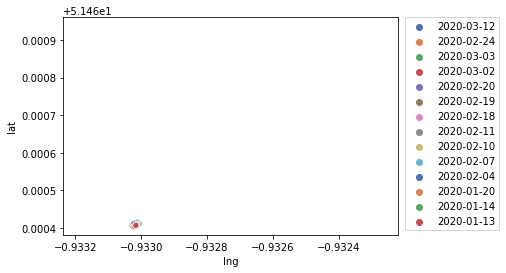

30:07:4d:f3:43:15


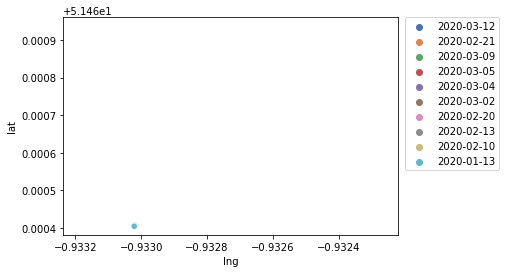

b4:6b:fc:06:18:69


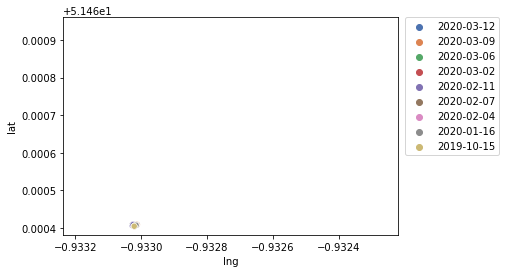

9c:b6:d0:e1:9b:4b


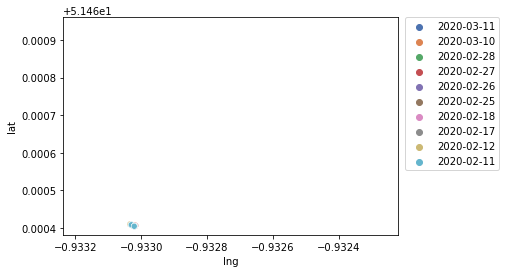

60:57:18:d7:19:c3


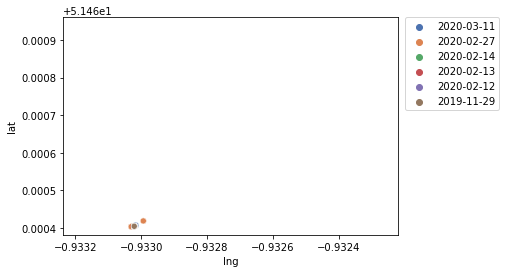

6c:c7:ec:6c:ec:9a


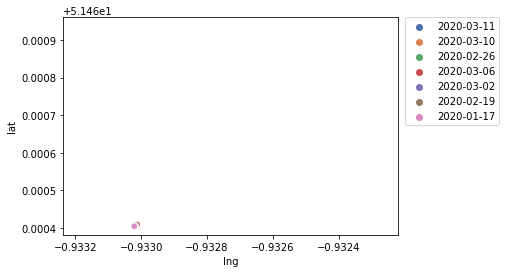

d8:68:c3:a3:80:91


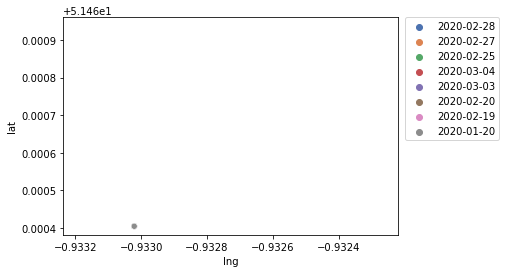

dc:53:60:c0:18:3b


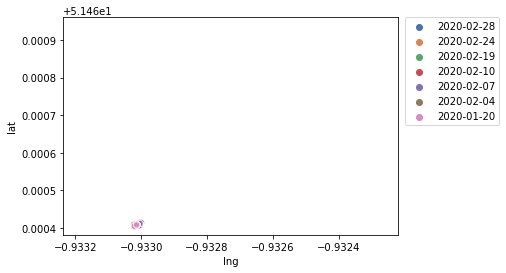

9c:b6:d0:e2:75:ed


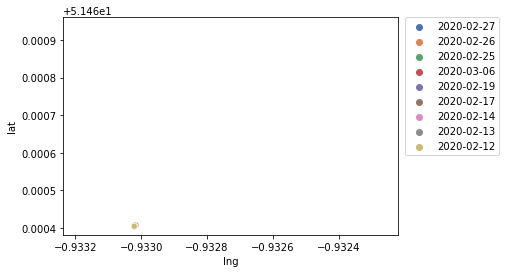

bc:e1:43:2a:fe:d9


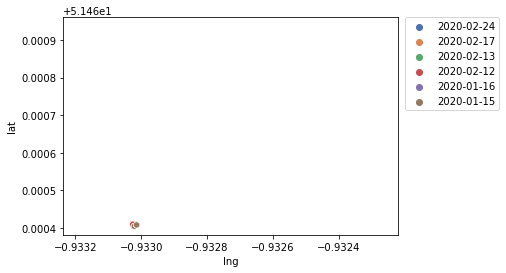

4c:66:41:db:99:33


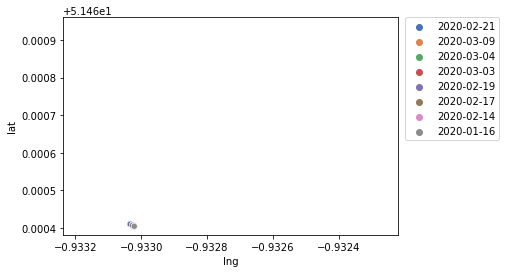

94:0c:98:21:6b:6d


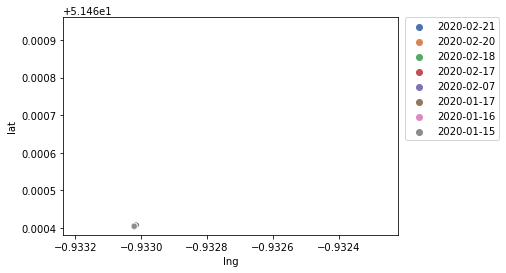

In [85]:
# plot machinary colored by level
for i in df_machine["ClientMacAddr"].unique():
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df_machine[df_machine['ClientMacAddr'] == i], hue="date", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()

04:72:95:42:af:df


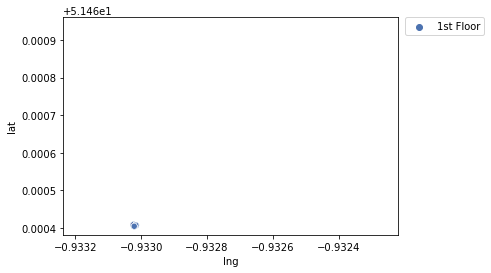

1c:5c:f2:ac:52:3f


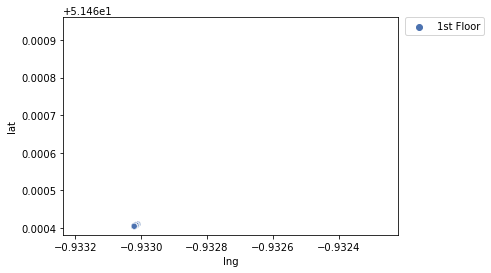

9c:4e:36:92:ec:e4


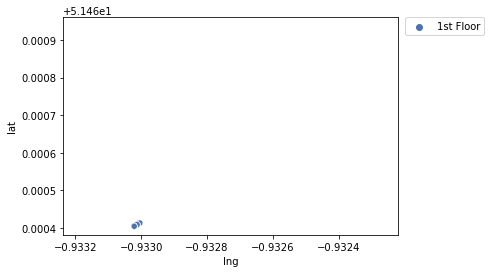

9c:4e:36:86:82:ec


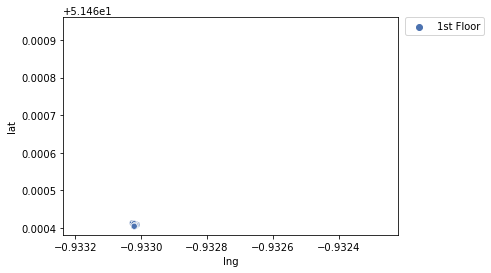

f0:98:9d:67:ba:9f


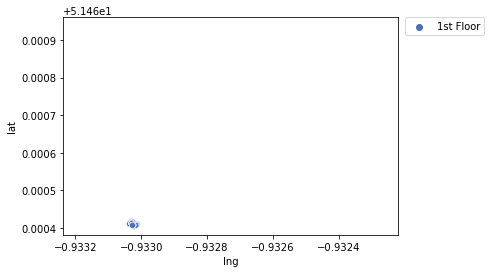

5c:e0:c5:ad:af:f2


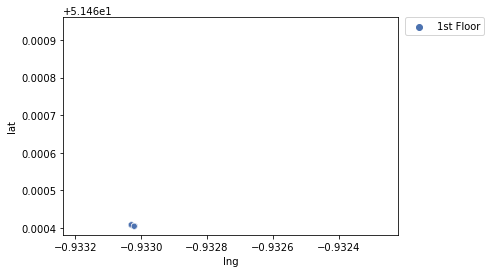

fc:4d:d4:55:31:b4


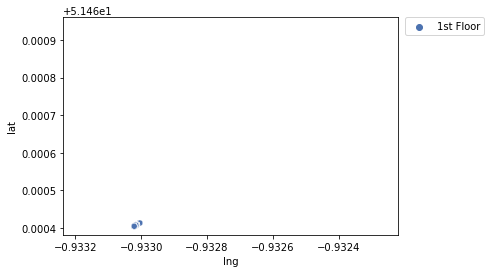

6c:c7:ec:66:ab:a5


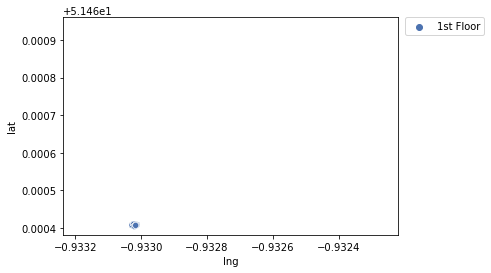

a4:f1:e8:1c:a9:04


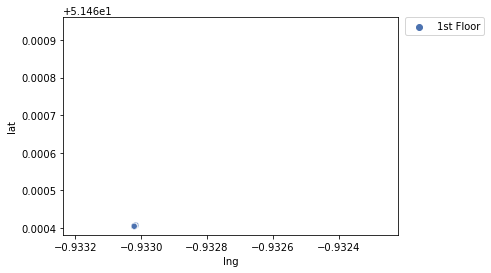

c4:e9:84:09:a4:6f


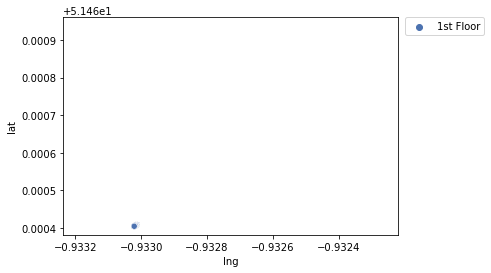

dc:53:60:c0:18:5e


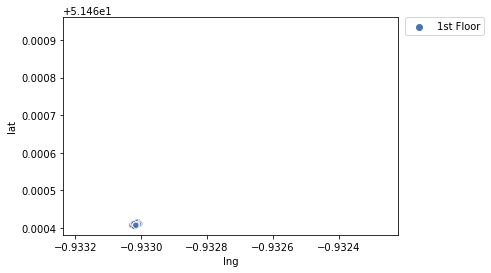

30:07:4d:f3:43:15


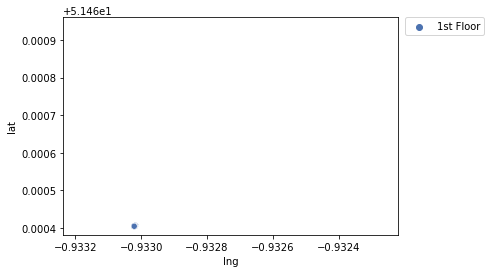

b4:6b:fc:06:18:69


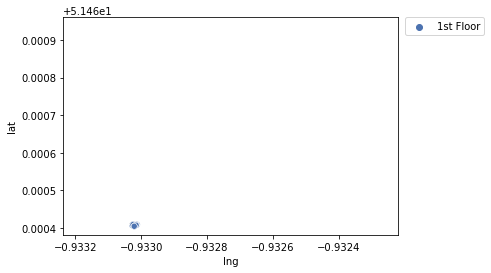

9c:b6:d0:e1:9b:4b


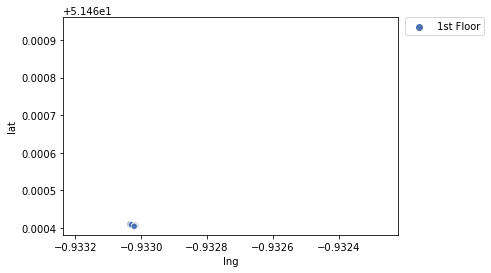

60:57:18:d7:19:c3


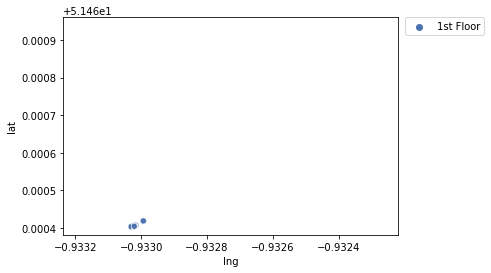

6c:c7:ec:6c:ec:9a


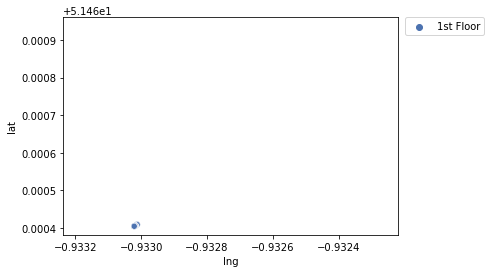

d8:68:c3:a3:80:91


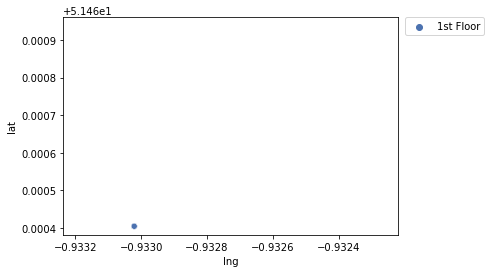

dc:53:60:c0:18:3b


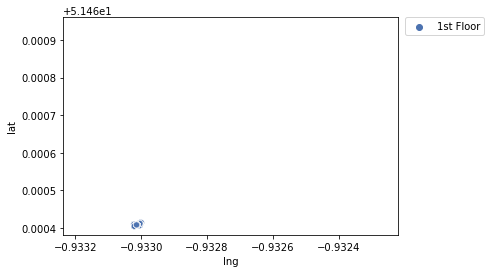

9c:b6:d0:e2:75:ed


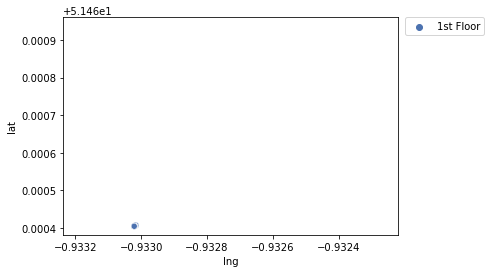

bc:e1:43:2a:fe:d9


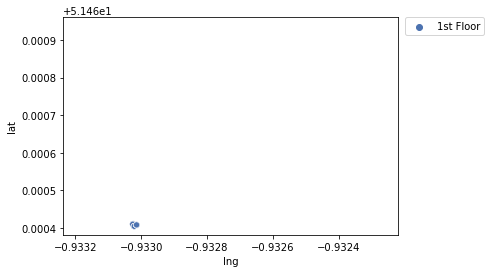

4c:66:41:db:99:33


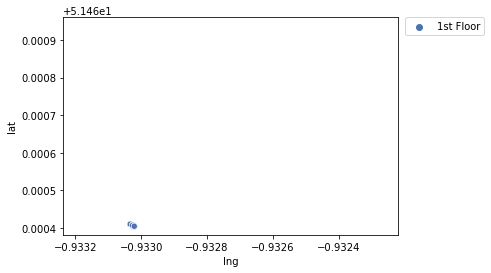

94:0c:98:21:6b:6d


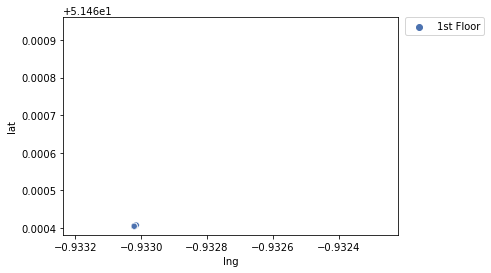

In [86]:
# plot machinary colored by level
for i in df_machine["ClientMacAddr"].unique():
    print(i)
    sns.scatterplot(x="lng", y="lat", data=df_machine[df_machine['ClientMacAddr'] == i], hue="Level", palette="deep")
    plt.xlim([min_lng, max_lng])
    plt.ylim([min_lat, max_lat])
    plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
    plt.show()